In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:16pt;}
div.text_cell_render.rendered_html{font-size:16pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:16pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
table.dataframe{font-size:16px;}
</style>
"""))

- 2013년이후 전국 아파트분양가격
- 공공데이터 포털에 있는 데이터를 Pandas의 melt, concat, transpose와 같은 reshape 기능을 활용해 분석
- groupby, pivot_table, info, describe, value_counts등을 통한 데이터 요약과 분석
- 이를 통해 전혀 다른 두 데이터의 정제와 병합, 수치형 데이터의 차이를 이해하고 다양한 그래프로 시각화(barplot, lineplot, scatterplot, lmplot, swarmplot, histplot)

# 1. 패키지로드 & 한글설정 & 경고메세지 ignore

In [1]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
sns.set(style='white', rc={'figure.figsize':(24,10)})
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# 다른 폰트를 기본 폰트로 하려면
from matplotlib.font_manager import FontProperties
font_path = 'C:/Windows/Fonts/CAT.ttf'
font_prop = FontProperties(fname=font_path, size=30)
# plt.rc('font', family=font_prop.get_name())

# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='ignore')

# 2. 데이터 다운로드
- https://www.data.go.kr 에서 "아파트 분양 가격"을 검색한 csv 다운로드

## (1) 2013년9월부터 2015년8월까지 데이터는 df_first 변수에 담아 탐색

In [2]:
df_first = pd.read_csv('C:/taro/ai/downlload/shareData/부동산/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                       encoding='cp949')
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [6]:
df_first.shape

(17, 22)

In [3]:
df_first_heat = df_first.set_index('지역')
df_first_heat.sample(3)

,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
지역,,,,,,,,,,,,,,,,,,,,,
경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,6767,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,6719,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,6577,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037


- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

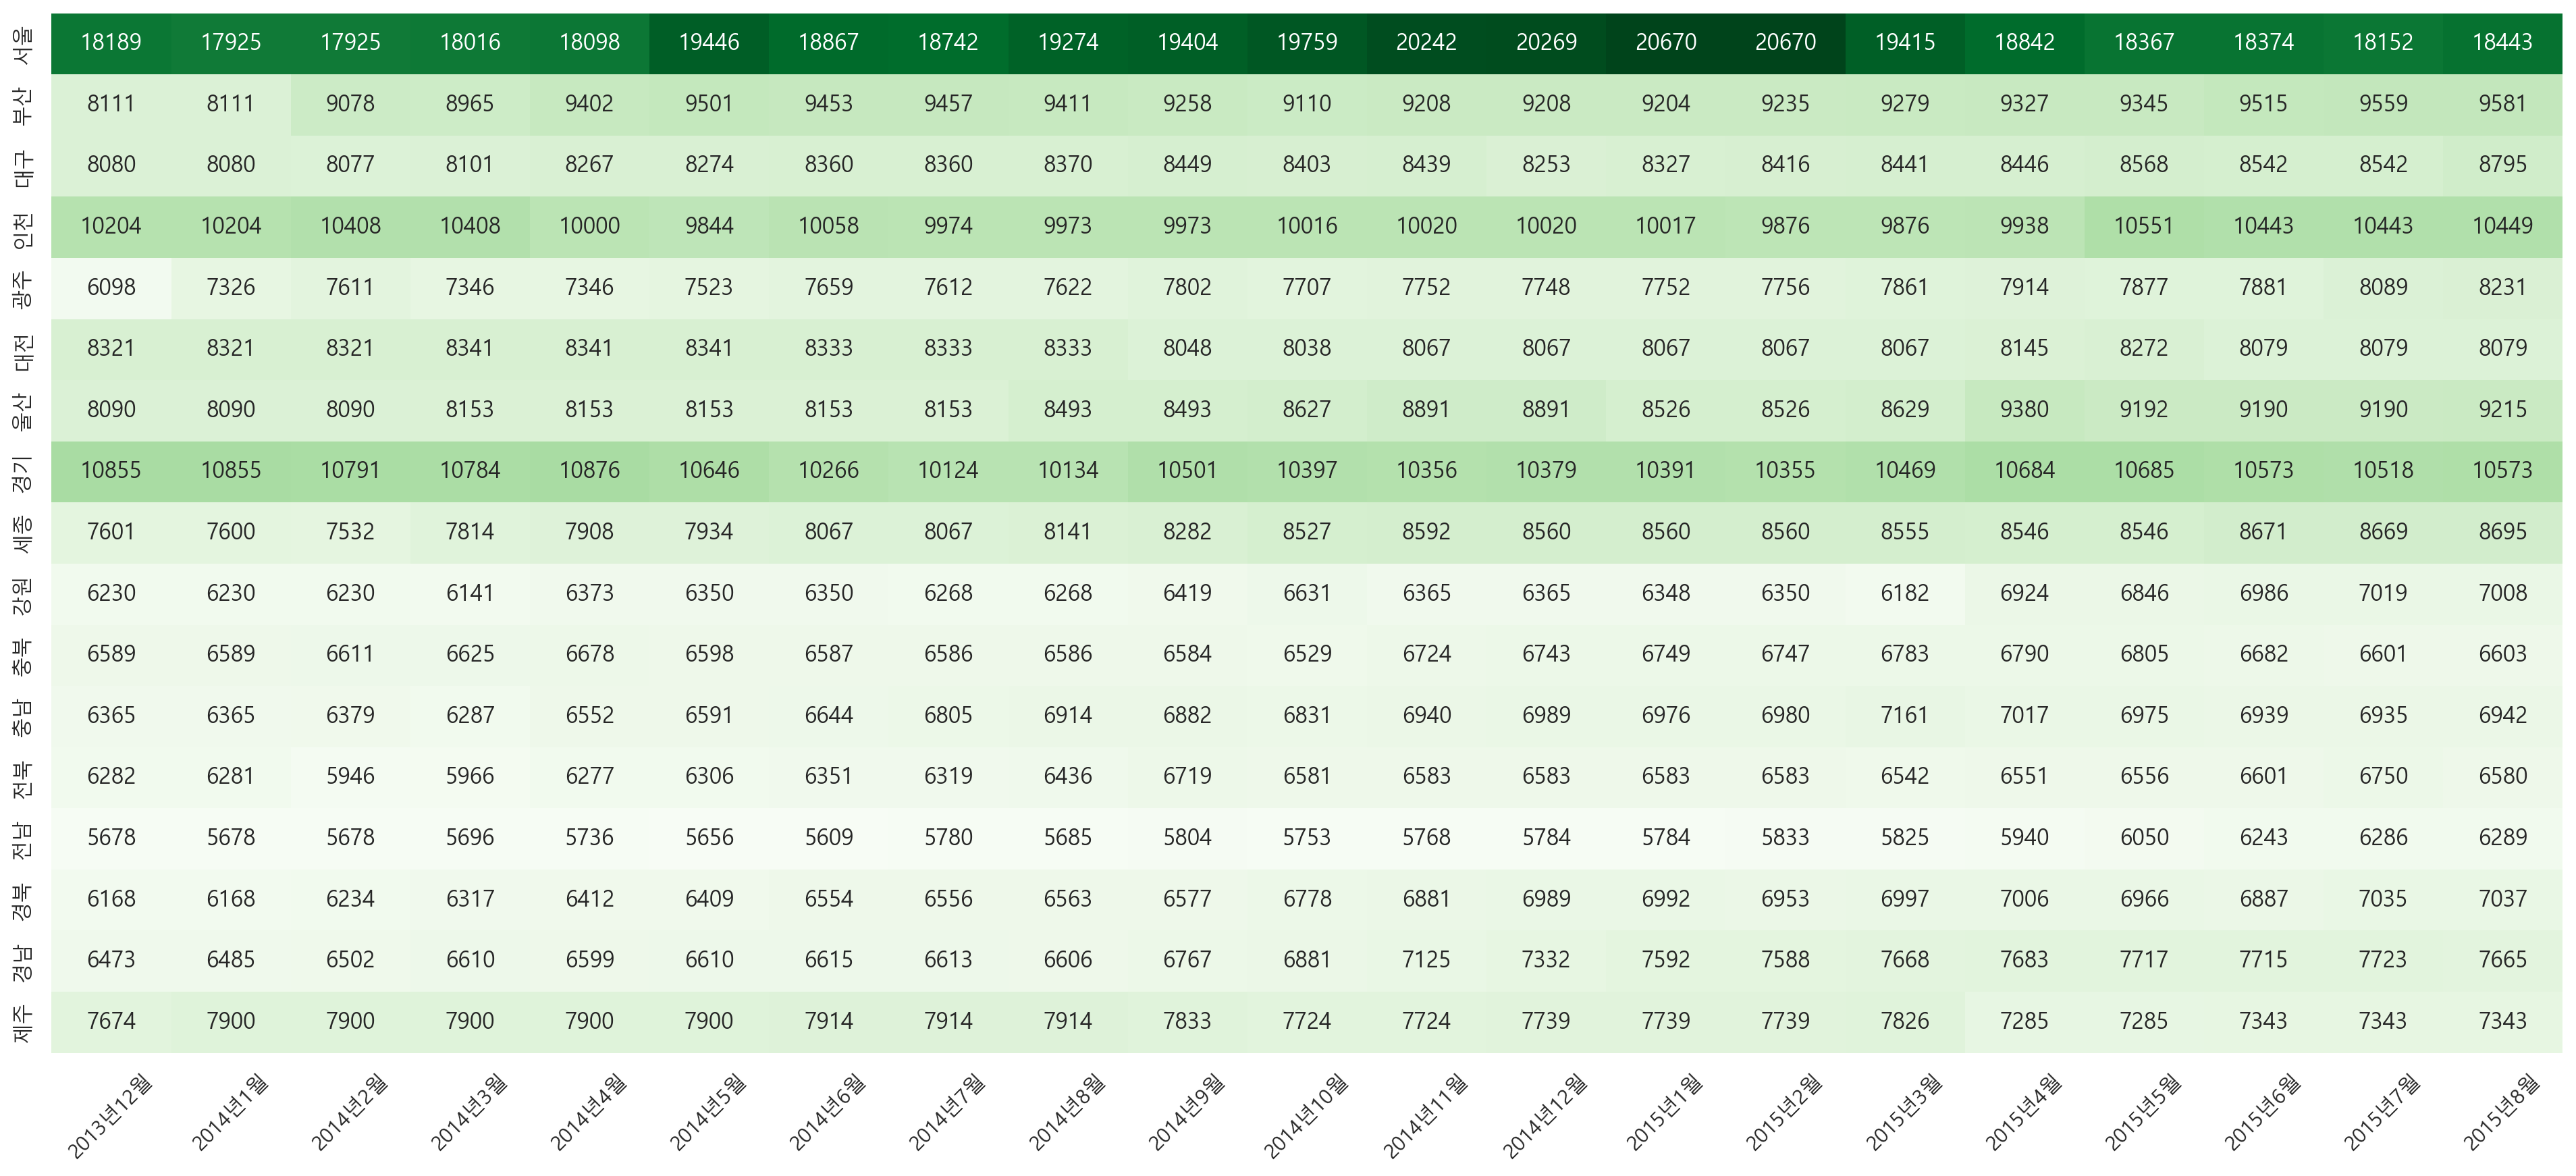

In [4]:
sns.heatmap(df_first_heat, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xticks(rotation=45)
plt.ylabel(None)
plt.show()

## (2) 이후 데이터는 df_last 변수에 담아 탐색

In [5]:
df_last = pd.read_csv('c:/taro/ai/downlload/shareData/부동산/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv',
                      encoding='cp949')
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [17]:
# 데이터 요약하기
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         9095 non-null   object
 1   규모구분        9095 non-null   object
 2   연도          9095 non-null   int64 
 3   월           9095 non-null   int64 
 4   분양가격(제곱미터)  8481 non-null   object
dtypes: int64(2), object(3)
memory usage: 355.4+ KB


# 3. df_last의 데이터 결측치를 확인하고 대체 고민

In [19]:
# 열별 결측치 갯수
df_last.isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    614
dtype: int64

In [20]:
# 열별 결측치를 제외한 갯수
df_last.notna().sum()

지역명           9095
규모구분          9095
연도            9095
월             9095
분양가격(제곱미터)    8481
dtype: int64

In [22]:
# '분양가격(제곱미터)' 컬럼의 결측치 갯수와 결측치가 아닌 갯수, 전체 데이터 수
print('전체갯수 :', len(df_last)['분양가격(제곱미터)'], df_last.shape[0])
print('결측치가 아닌 갯수 :', df_last['분양가격(제곱미터)'].notna.sum())
print('결측치 갯수 :', df_last['분양가격(제곱미터)'].isna.sum())

TypeError: 'int' object is not subscriptable

# 4. df_last 데이셋에 평당분양가격컬럼 추가

## (1) astype('float')나 pd.to_numeric() 사용
## (2) 6,222 => 6222 수정, space가 저장된 경우 nan으로 수정하는 함수를 apply나 map적용
## (3) df_last['분양가격(제곱미터)']*3.3

In [23]:
df_last.loc[0, '분양가격(제곱미터)']

'5841'

In [6]:
# df_last.groupby('지역명')['분양가격(제곱미터)'].mean() 에러남
# df_last['분양가격(제곱미터)']*3.3 에러남
# df_last['분양가격(제곱미터)'].astype('f')
# 숫자로 변경할 때 예외발생시 예외발생말고 nan으로
pd.to_numeric(df_last['분양가격(제곱미터)'], errors='coerce').isna().sum() # 원래 결측치 갯수(614)

744

In [7]:
# 분양가격에 space가 있는 경우
df_last[df_last['분양가격(제곱미터)'].str.strip() == ''].shape

(126, 5)

In [8]:
df_last.loc[df_last['분양가격(제곱미터)'].str.strip() == '', '지역명'].value_counts()

세종    30
제주    19
대구    19
광주    12
전남    11
대전    10
울산    10
전북     8
경남     5
서울     2
Name: 지역명, dtype: int64

In [9]:
# 분양가격에 ,가 있는 경우
df_last[df_last['분양가격(제곱미터)'].notna() & (df_last['분양가격(제곱미터)'].str.find(',') != -1)]

,지역명,규모구분,연도,월,분양가격(제곱미터)
80,제주,모든면적,2015,10,"2,232"
82,제주,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"2,225"
83,제주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"2,583"
84,제주,전용면적 102제곱미터초과,2015,10,"2,574"


### apply
- apply(함수, axis) : 1차원, 2차원(axis 지정. axis기본값0)
- map(함수) : 1차원
- applymap(함수) : 2차원(모든 요소들에 함수를 적용)

In [38]:
# 콤마가 있는 문자에서 콤마 없애기 방법1
temp = '12,523'
temp.replace(',','')

'12523'

In [37]:
# 콤마가 있는 문자에서 콤마 없애기 방법2
temp = '12,523'
tempsplited = temp.split(',')
''.join(tempsplited)

'12523'

In [10]:
# 분양가격 컬럼에 콤마(,)가 있는 경우 콤마(,)를 제거('5,123' -> '5123')
# 공백문자가 있는 경우 np.nan로 바꾸는 함수
def commadrop(row):
    row = row.copy()
    price = row['분양가격(제곱미터)']
    # price(스칼라데이터)가 결측치인지 여부
        # (1) price is np.nan : 값의 타입에 상관없이 nan인지 여부
        # (2) pd.isna(price), pd.isnull(값) : 값의 타입에 상관없이 nan인지 여부
        # (3) np.isnan(숫자데이터): 값이 숫자가 아닐 경우 에러. 숫자일경우 nan인지 여부
    if price is np.nan:
        pass
    elif price.strip() == '': # space면 결측치로
        row['분양가격(제곱미터)'] = np.nan
    elif price.find(',') != -1: # 콤마가 있으면 ,를 없애고 float형 변환
        pricesplited = price.split(',')
        row['분양가격(제곱미터)'] = float(''.join(pricesplited))
    else:
        row['분양가격(제곱미터)'] = float(price)
    return row

commadrop(df_last.loc[80]) # 콤마 제외
commadrop(df_last.loc[1]) # 그대로
commadrop(df_last.loc[28]) # 공백문자의 경우 nan
commadrop(df_last.loc[368]) # nan의 경우 nan

지역명                                광주
규모구분          전용면적 85제곱미터초과 102제곱미터이하
연도                               2016
월                                   2
분양가격(제곱미터)                        NaN
Name: 368, dtype: object

In [11]:
# 공백문자는 결측치로, 콤마는 제거하기를 모든 행에 적용
df_last.apply(commadrop, axis=1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841.0
1,서울,전용면적 60제곱미터이하,2015,10,5652.0
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0
4,서울,전용면적 102제곱미터초과,2015,10,5879.0
...,...,...,...,...,...
9090,제주,모든면적,2024,8,7703.0
9091,제주,전용면적 60제곱미터이하,2024,8,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515.0
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN


In [12]:
df_last.apply(commadrop, axis=1).isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    740
dtype: int64

### map

In [13]:
# 결측치->결측치 return, 공백문자->결측치 return, '3,198' -> 3198 return, '3198'->3198 return,  
def commadrop2(price):
    if pd.isna(price):
        return np.nan
    elif price.strip() == '':
        return np.nan
    elif price.find(',') != -1:
        pricesplited = price.split(',')
        return float(''.join(pricesplited))
    else:
        return float(price)

commadrop2(df_last.loc[80, '분양가격(제곱미터)']) # 콤마제외한 문자를 숫자로 
commadrop2(df_last.loc[1, '분양가격(제곱미터)']) # 콤마없는 문자를 숫자로 
commadrop2(df_last.loc[28, '분양가격(제곱미터)']) # 공백문자를 nan
commadrop2(df_last.loc[368, '분양가격(제곱미터)']) # nan을 nan

nan

- apply(함수, axis) : 1차원, 2차원(axis 지정. axis기본값0)
- map(함수) : 1차원
- applymap(함수) : 2차원(모든 요소들에 함수를 적용)

In [ ]:
#df_last['분양가격(제곱미터)'].apply(commadrop2)
#df_last['분양가격(제곱미터)'].map(commadrop2)

In [14]:
df_last['분양가격(제곱미터)'].apply(commadrop2)
df_last['분양가격(제곱미터)'].map(commadrop2)

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
9090    7703.0
9091       NaN
9092    7515.0
9093       NaN
9094    7950.0
Name: 분양가격(제곱미터), Length: 9095, dtype: float64

### apply나 map사용 안 하기

In [15]:
pd.to_numeric(df_last['분양가격(제곱미터)'].str.strip().str.replace(',','')).isna().sum()

740

In [16]:
df_last['분양가격(제곱미터)'] = pd.to_numeric(df_last['분양가격(제곱미터)'].str.strip().str.replace(',',''))

In [17]:
df_last['평당분양가격'] = df_last['분양가격(제곱미터)']*3.3
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8355 non-null   float64
 5   평당분양가격      8355 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 426.5+ KB


# 5. df_last 데이터셋에서 전용면적 컬럼을 추가한다
- 전용면적 컬럼, 필요없는 컬럼 처리로 메모리 절약

In [18]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7


In [19]:
df_last['규모구분'].unique()

array(['모든면적', '전용면적 60제곱미터이하', '전용면적 60제곱미터초과 85제곱미터이하',
       '전용면적 85제곱미터초과 102제곱미터이하', '전용면적 102제곱미터초과'], dtype=object)

In [20]:
# 전용면적, 이하, '' 없애기, 제곱미터 -> 
x = '전용면적 85제곱미터초과 102제곱미터이하'
import re
re.sub('전용면적|이하| ', '', x).replace('제곱미터', 'm²').replace('초과','~')

'85m²~102m²'

In [ ]:
# 방법2
df_last['전용면적'] = df_last['규모구분'].apply(lambda x : x.replace('전용면적',''))
df_last['전용면적'] = df_last['전용면적'].apply(lambda x : x.replace('제곱미터','m²'))
df_last['전용면적'] = df_last['전용면적'].apply(lambda x : x.replace('초과','~'))
df_last['전용면적'] = df_last['전용면적'].apply(lambda x : x.replace('이하',''))
df_last['전용면적'] = df_last['전용면적'].apply(lambda x : x.replace(' ',''))

In [21]:
# 방법3
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적', '')\
                                    .str.replace('제곱미터', 'm²')\
                                    .str.replace('초과', '~')\
                                    .str.replace('이하', '')\
                                    .str.replace(' ', '')
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격,전용면적
0,서울,모든면적,2015,10,5841.0,19275.3,모든면적
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6,60m²
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6,60m²~85m²
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3,85m²~102m²
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7,102m²~


In [23]:
print(df_last['규모구분'].unique())
print(df_last['전용면적'].unique())

['모든면적' '전용면적 60제곱미터이하' '전용면적 60제곱미터초과 85제곱미터이하' '전용면적 85제곱미터초과 102제곱미터이하'
 '전용면적 102제곱미터초과']
['모든면적' '60m²' '60m²~85m²' '85m²~102m²' '102m²~']


# 6. 메모리 사용량을 줄이기 위해 불필요한 컬럼 제거

In [22]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8355 non-null   float64
 5   평당분양가격      8355 non-null   float64
 6   전용면적        9095 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 497.5+ KB


In [25]:
# 컬럼순서를 바꿔서 백업
# df_last = df_last[['지역명','전용면적','연도','월','평당분양가격']]
col = df_last.pop('전용면적') # '전용면적' 컬럼 뻬서 col변수 할당
df_last.insert(1, '전용면적', col) # 1번째 열에 col 추가
df_last.head()

,지역명,전용면적,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,모든면적,2015,10,5841.0,19275.3
1,서울,60m²,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,60m²~85m²,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,85m²~102m²,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,102m²~,전용면적 102제곱미터초과,2015,10,5879.0,19400.7


In [24]:
df_last.to_csv('data/df_last.csv', index=False) # 전처리 단계 백업

# 7. 데이터 집계
- GroupBy(unstack()함수 이용) vs. pivot_table()
- 우선 결측치 대체전 데이터 집계와 시각화를 할 예정

In [ ]:
# 지역별 데이터 수(결측치 포함)
df_last['지역명'].value_counts() # 정렬까지

In [27]:
# 지역명별 데이터 행 갯수(결측치 제외) : 결과가 1차원 시리즈
df_last.groupby(['지역명'])['평당분양가격'].count().sort_values(
                                            # ascending=False) 내림차순
)

지역명
울산    395
세종    409
대전    415
제주    439
광주    450
대구    495
전남    507
경북    511
경남    516
충남    516
전북    520
강원    523
서울    527
인천    531
부산    533
충북    533
경기    535
Name: 평당분양가격, dtype: int64

In [29]:
# 지역명별 데이터 행 갯수(결측치 제외) : 결과가 2차원 데이터프레임
df_last.groupby(['지역명'])[['평당분양가격']].count().sort_values(by='평당분양가격'
                                            # ascending=False) 내림차순
)
# 2
df_last.groupby(['지역명'])['평당분양가격'].count().sort_values(
                                            # ascending=False) 내림차순
).to_frame()
# 3
df_last.groupby(['지역명'])['평당분양가격'].count().reset_index().sort_values(by='평당분양가격')

# 4
df_last.groupby(['지역명'], as_index=false)['평당분양가격'].count().sort_values()

#5
df_last.groupby(['지역명'])[['평당분양가격']].count().sort_values()

,평당분양가격
지역명,
울산,395
세종,409
대전,415
제주,439
광주,450
대구,495
전남,507
경북,511
경남,516


- df_last.groupby(["인덱스로사용할컬럼명"])["계산할컬럼명"].연산함수()
- df_last.pivot_table(index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")
- pd.pivot_table(df_last, index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")

## (1) 지역별 데이터수

In [31]:
# 지역명별 데이터 행 갯수(결측치 제외) : 결과가 2차원 데이터프레임 - pivot_table
df_last.pivot_table(index=['지역명'],
                   values='평당분양가격',
                   aggfunc='count')
pd.pivot_table(df_last, index='지역명',
              values='평당분양가격',
              aggfunc='count')

,평당분양가격
지역명,
강원,523
경기,535
경남,516
경북,511
광주,450
대구,495
대전,415
부산,533
서울,527


## (2) 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

In [34]:
# 지역명별 최대값
df_last.groupby(['지역명'])[['평당분양가격']].max()

,평당분양가격
지역명,
강원,17806.8
경기,24172.5
경남,16566.0
경북,15345.0
광주,24951.3
대구,30600.9
대전,30851.7
부산,31904.4
서울,61917.9


In [35]:
# 지역명별 평당분양가격 평균
df_last.groupby(['지역명'])[['평당분양가격']].mean()

,평당분양가격
지역명,
강원,10078.717400
경기,15420.030280
경남,10776.955814
경북,10261.553425
광주,12998.216000
대구,14434.520000
대전,12829.565060
부산,14896.949156
서울,27755.404554


In [37]:
# 지역명별 평당분양가격 describe
df_last.groupby(['지역명'])['평당분양가격'].describe().applymap()a

,count,mean,std,min,25%,50%,75%,max
지역명,,,,,,,,
강원,523.0,10078.717400,2828.907867,6639.6,7652.700,9428.10,11873.400,17806.8
경기,535.0,15420.030280,3245.863323,10160.7,13274.250,14652.00,17168.250,24172.5
경남,516.0,10776.955814,2223.562736,7260.0,9187.200,10254.75,12031.800,16566.0
경북,511.0,10261.553425,2276.026239,6949.8,8378.700,9705.30,12500.400,15345.0
광주,450.0,12998.216000,3637.557312,7428.3,9554.325,12673.65,15213.000,24951.3
대구,495.0,14434.520000,3407.303427,8259.9,11949.300,14711.40,16338.300,30600.9
대전,415.0,12829.565060,4191.685609,8002.5,9401.700,11820.60,15310.350,30851.7
부산,533.0,14896.949156,4059.939958,9669.0,12467.400,13411.20,17301.900,31904.4
서울,527.0,27755.404554,6566.391764,16701.3,22497.750,26763.00,31054.650,61917.9


In [47]:
# 지역명별 평당분양가격 최대값
df_last.pivot_table(index=['지역명'],
                   values=['평당분양가격'],
                   aggfunc='max')
pd.pivot_table(df_last,index=['지역명'],
                   values=['평당분양가격'],
                   aggfunc='max')

,평당분양가격
지역명,
강원,17806.8
경기,24172.5
경남,16566.0
경북,15345.0
광주,24951.3
대구,30600.9
대전,30851.7
부산,31904.4
서울,61917.9


In [48]:
# 지역명별 평당분양가격 평균
df_last.pivot_table(index=['지역명'],
                   values=['평당분양가격'])
pd.pivot_table(df_last, index=['지역명'],
                   values=['평당분양가격']).iloc[:3]

,평당분양가격
지역명,
강원,10078.717400
경기,15420.030280
경남,10776.955814


In [49]:
# 지역명별 평당분양가격 통계요약정보
r = df_last.pivot_table(index=['지역명'],
                   values=['평당분양가격'],
                   #values = '평당분양가격' ,
                   aggfunc='describe')
r.columns = r.columns.droplevel(0)
r

,25%,50%,75%,count,max,mean,min,std
지역명,,,,,,,,
강원,7652.700,9428.10,11873.400,523.0,17806.8,10078.717400,6639.6,2828.907867
경기,13274.250,14652.00,17168.250,535.0,24172.5,15420.030280,10160.7,3245.863323
경남,9187.200,10254.75,12031.800,516.0,16566.0,10776.955814,7260.0,2223.562736
경북,8378.700,9705.30,12500.400,511.0,15345.0,10261.553425,6949.8,2276.026239
광주,9554.325,12673.65,15213.000,450.0,24951.3,12998.216000,7428.3,3637.557312
대구,11949.300,14711.40,16338.300,495.0,30600.9,14434.520000,8259.9,3407.303427
대전,9401.700,11820.60,15310.350,415.0,30851.7,12829.565060,8002.5,4191.685609
부산,12467.400,13411.20,17301.900,533.0,31904.4,14896.949156,9669.0,4059.939958
서울,22497.750,26763.00,31054.650,527.0,61917.9,27755.404554,16701.3,6566.391764


## (3) 전용면적별 평당분양가격(평균)

In [39]:
df_last.groupby('전용면적',
               # as_index=False
               )[['평당분양가격']].mean().sort_values(by='평당분양가격')

,평당분양가격
전용면적,
60m²,12522.774427
60m²~85m²,12619.048827
모든면적,12654.068098
85m²~102m²,13447.672835
102m²~,14066.826846


In [40]:
df_last.pivot_table(index='전용면적',
                   values='평당분양가격',
                   #aggfunc='mean'
                   )

,평당분양가격
전용면적,
102m²~,14066.826846
60m²,12522.774427
60m²~85m²,12619.048827
85m²~102m²,13447.672835
모든면적,12654.068098


## (4) 지역별, 전용면적별 평당분양가격(평균)

In [41]:
r = df_last.groupby(['지역명','전용면적'])['평당분양가격'].mean()
print(r['서울','모든면적'])
print(r['서울']) # 서울 모든전용면적
print(r[:, '모든면적']) # 모든지역의 모든면적

26829.678504672895
전용면적
102m²~        29035.948515
60m²          27371.156075
60m²~85m²     26662.612150
85m²~102m²    28972.177143
모든면적          26829.678505
Name: 평당분양가격, dtype: float64
지역명
강원     9538.326168
경기    14722.780374
경남    10146.513084
경북     9856.637383
광주    12798.356075
대구    14516.541346
대전    11947.572897
부산    14764.539252
서울    26829.678505
세종    10840.996774
울산    13470.835714
인천    13896.793458
전남     8970.541121
전북     8662.284112
제주    16338.885981
충남     9153.583178
충북     8547.986916
Name: 평당분양가격, dtype: float64


In [42]:
r = df_last.groupby(['지역명','전용면적'])[['평당분양가격']].mean()
print(r.loc['서울']) # 레벨0인덱스로 액세스
print(r.loc[('서울','모든면적')])
# print(r.loc[(..., '모든면적')]) 에러남
print(r.xs(key='모든면적', level='전용면적')) # 레벨1인덱스로 액세스

                  평당분양가격
전용면적                    
102m²~      29035.948515
60m²        27371.156075
60m²~85m²   26662.612150
85m²~102m²  28972.177143
모든면적        26829.678505
평당분양가격    26829.678505
Name: (서울, 모든면적), dtype: float64
           평당분양가격
지역명              
강원    9538.326168
경기   14722.780374
경남   10146.513084
경북    9856.637383
광주   12798.356075
대구   14516.541346
대전   11947.572897
부산   14764.539252
서울   26829.678505
세종   10840.996774
울산   13470.835714
인천   13896.793458
전남    8970.541121
전북    8662.284112
제주   16338.885981
충남    9153.583178
충북    8547.986916


In [43]:
# unstack() : level0(지역명) 인덱스는 그대로 두고, level1을 컬럼으로
df_last.groupby(['지역명','전용면적'])['평당분양가격'].mean().unstack().round(1)

전용면적,102m²~,60m²,60m²~85m²,85m²~102m²,모든면적
지역명,,,,,
강원,11314.8,9441.9,9383.5,10795.5,9538.3
경기,16559.1,15291.2,14787.2,15739.9,14722.8
경남,11522.5,10122.2,10107.8,12150.6,10146.5
경북,11060.6,9731.9,9828.3,10968.3,9856.6
광주,14749.2,12254.0,12656.0,12291.7,12798.4
대구,15564.0,13748.4,14494.4,13713.9,14516.5
대전,17662.0,11834.2,11920.1,13002.6,11947.6
부산,15741.4,14448.6,14745.0,14801.0,14764.5
서울,29035.9,27371.2,26662.6,28972.2,26829.7


In [44]:
df_last.pivot_table(index=['지역명','전용면적'],
                   values='평당분양가격',
                   # aggfunc='mean'
                   ).unstack().head(1)

평당분양가격                                                     
전용면적        102m²~         60m²    60m²~85m²    85m²~102m²         모든면적
지역명                                                                    
강원    11314.805607  9441.885981  9383.472897  10795.481053  9538.326168

In [45]:
r = df_last.pivot_table(index='지역명',
                   columns='전용면적',
                   values='평당분양가격',
                   # aggfunc='mean'
                   )
r = r[['60m²', '60m²~85m²','85m²~102m²','102m²~', '모든면적']]
r.head()

전용면적,60m²,60m²~85m²,85m²~102m²,102m²~,모든면적
지역명,,,,,
강원,9441.885981,9383.472897,10795.481053,11314.805607,9538.326168
경기,15291.151402,14787.207477,15739.920561,16559.091589,14722.780374
경남,10122.231429,10107.838318,12150.634021,11522.478000,10146.513084
경북,9731.888571,9828.325234,10968.300000,11060.616346,9856.637383
광주,12254.043564,12655.962617,12291.714286,14749.190323,12798.356075


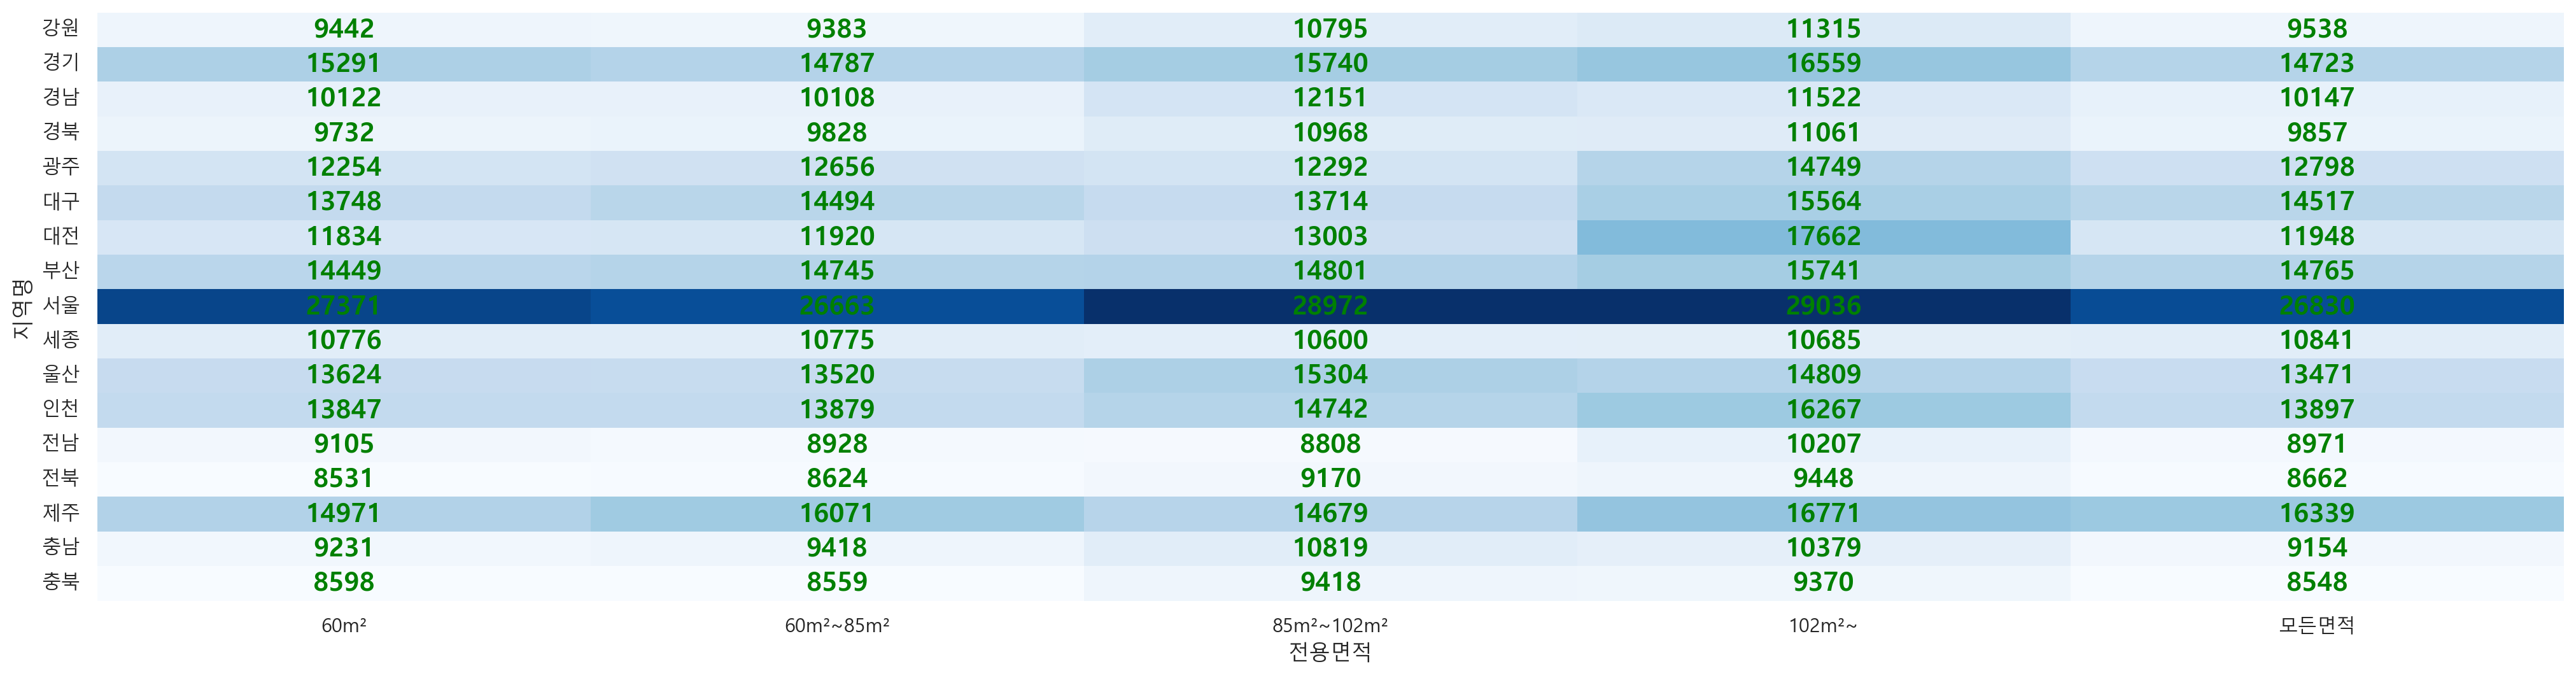

In [46]:
plt.figure(figsize=(25,6))
sns.heatmap(r, cmap='Blues', annot=True, fmt='.0f', cbar=False,
           annot_kws={'color':'green', 'size':15, 'weight':'bold'})
plt.show()

## (5) 연도, 지역별 평당분양가격(평균)

In [50]:
df_last.groupby(['연도','지역명'])['평당분양가격'].mean()

연도    지역명
2015  강원      7188.060000
      경기     11060.940000
      경남      8459.220000
      경북      7464.160000
      광주      7916.700000
                 ...     
2024  전남     13540.415625
      전북     12400.941667
      제주     25096.087500
      충남     12739.650000
      충북     12851.767500
Name: 평당분양가격, Length: 170, dtype: float64

In [52]:
df_last.pivot_table(index=['연도','지역명'],
                   values='평당분양가격').unstack()
r = df_last.pivot_table(index='연도',
                        columns='지역명',
                   values='평당분양가격')

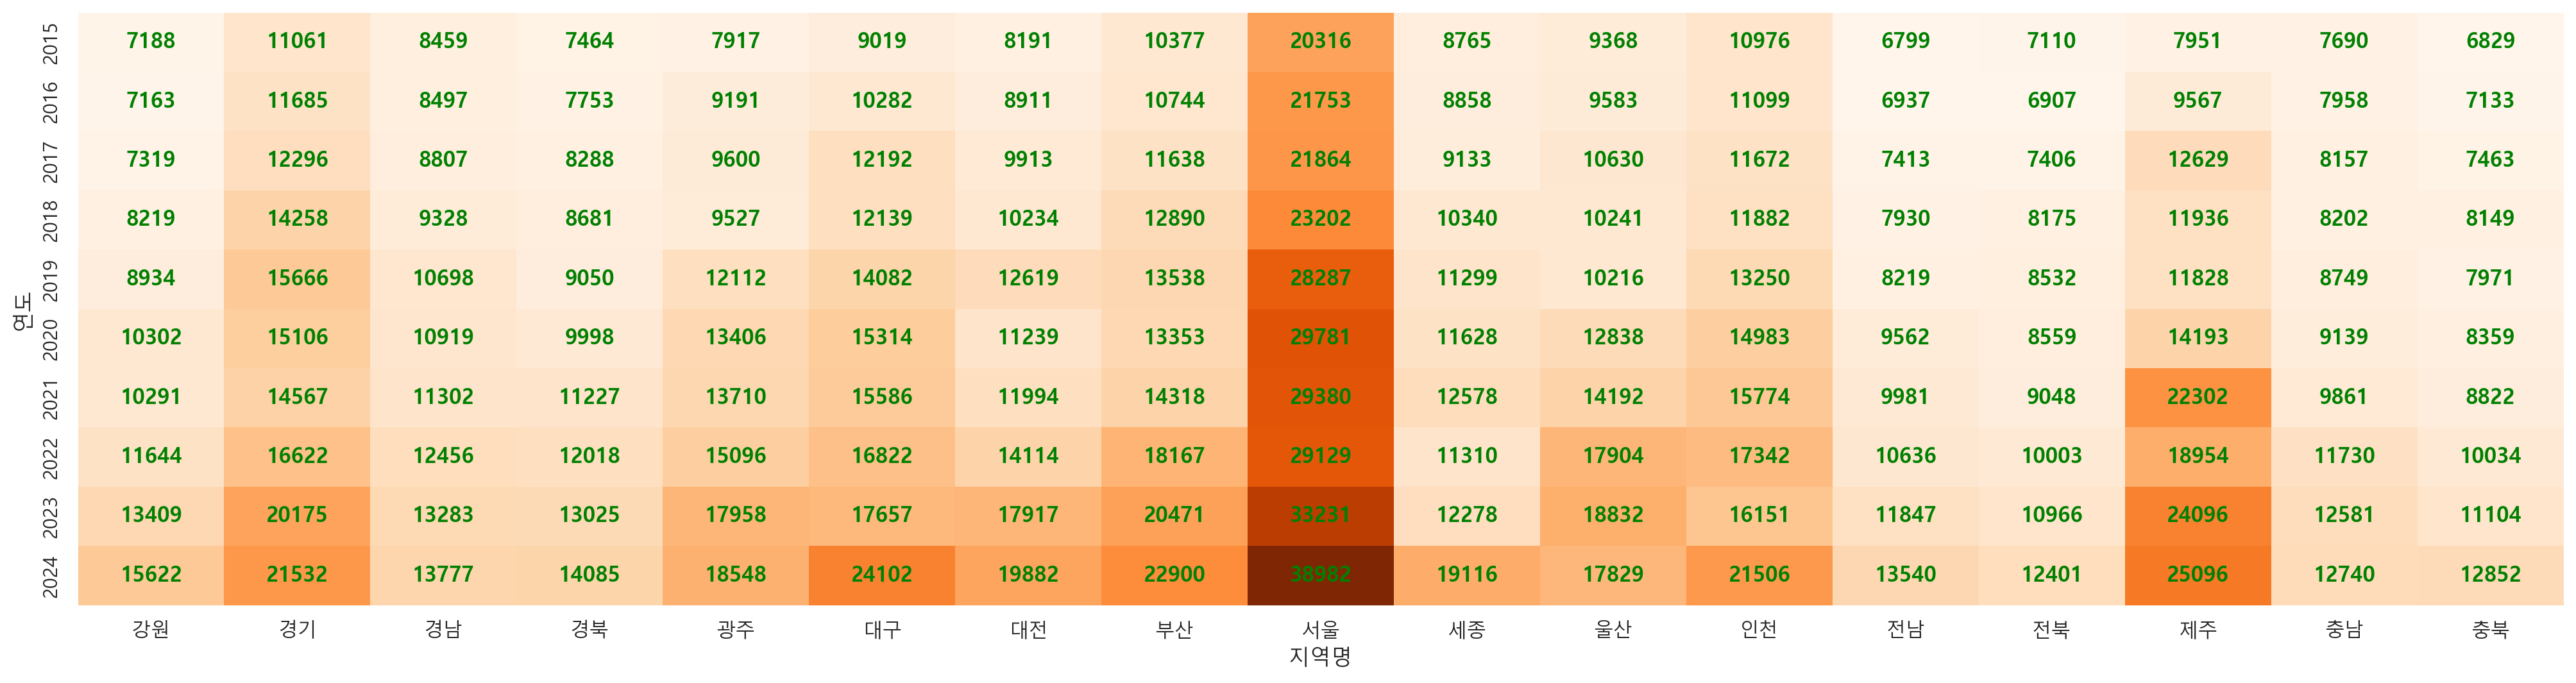

In [53]:
plt.figure(figsize=(25,6))
sns.heatmap(r, annot=True, fmt='.0f', cmap='Oranges',
           annot_kws={'weight':'bold', 'color':'green'}, cbar=False)
plt.show()

- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

# 8. matplotlib으로 시각화(위의 도표)
https://www.research.autodesk.com/publications/same-stats-different-graphs/
## (1) 지역별 결측치를 제외한 데이터수(line, bar)

In [54]:
result = df_last.groupby('지역명')['평당분양가격'].count().sort_values()
result.min()

395

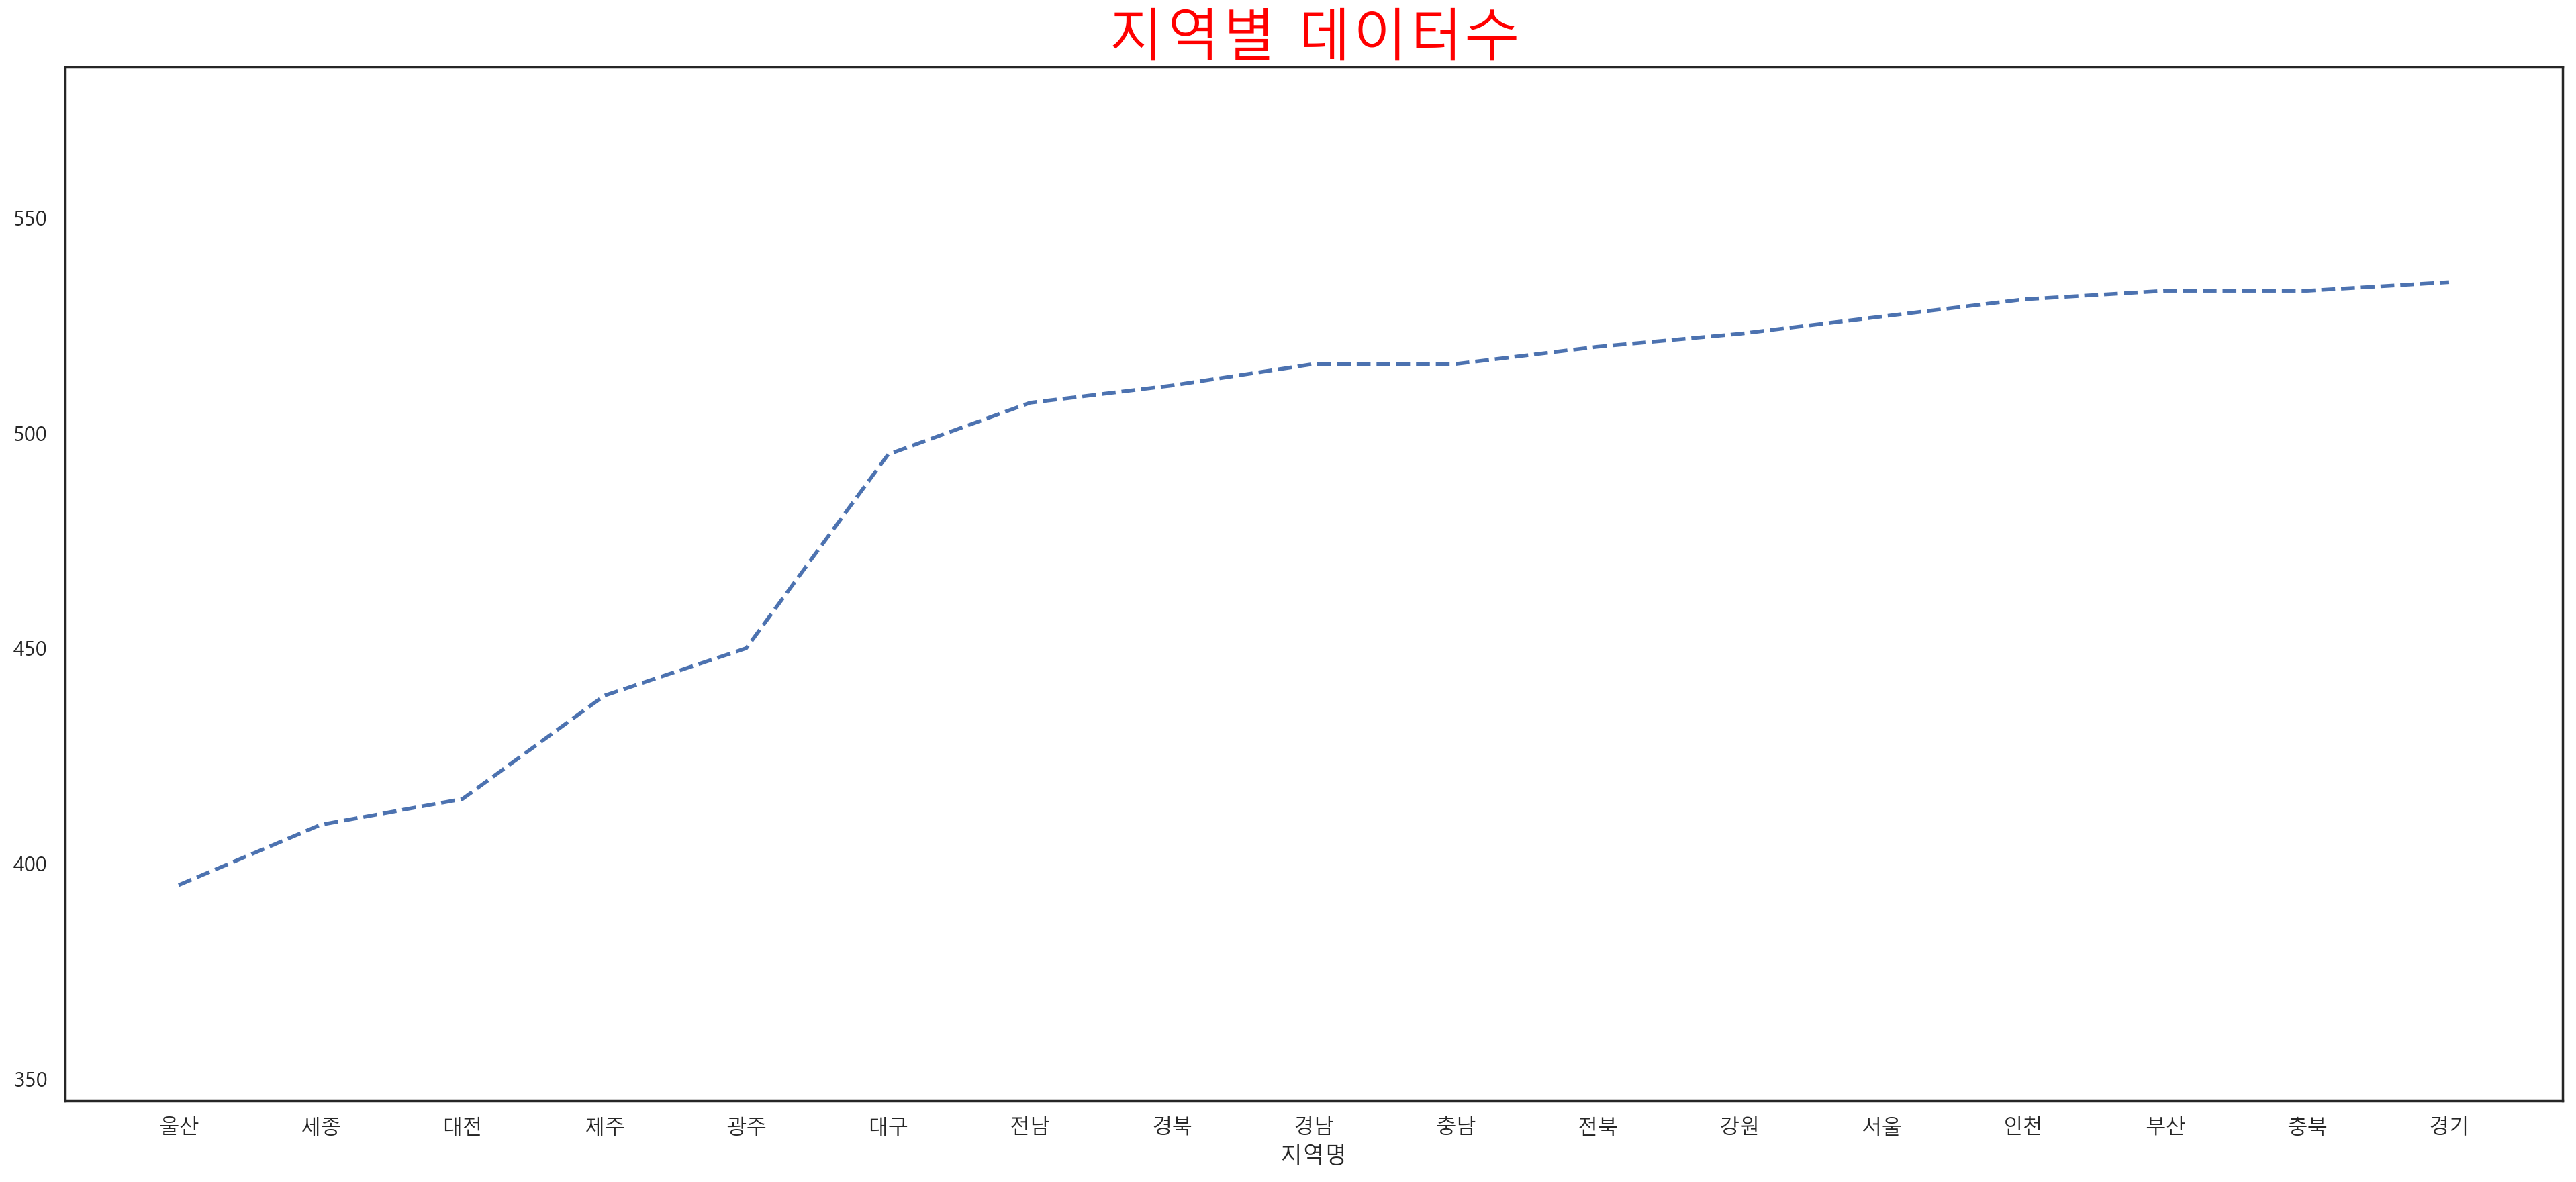

In [57]:
# result.plot.line()
ax = result.plot(kind='line', color='b', linestyle='--', linewidth=2,
           # ylim = [result.min()-50, result.max()+50]
                )
# plt.title('지역별 데이터 수', size=20, color='red')
ax.set_title('지역별 데이터수', size=30, color='red')
ax.set_ylim([result.min()-50, result.max()+50])
ax.set_xticks(range(len(result)))
ax.set_xticklabels(result.index)
plt.show()

In [64]:
result.plot(kind='bar', rot=0, size(18,3), title='지역별 데이터 수')
           # ylim = [result.min()-50, result.max()+50])
plt.ylim([result.min()-50, result.max()+50])
plt.show()

SyntaxError: positional argument follows keyword argument (1780292139.py, line 1)

## (2) 지역별 평당분양가격 (line, bar)

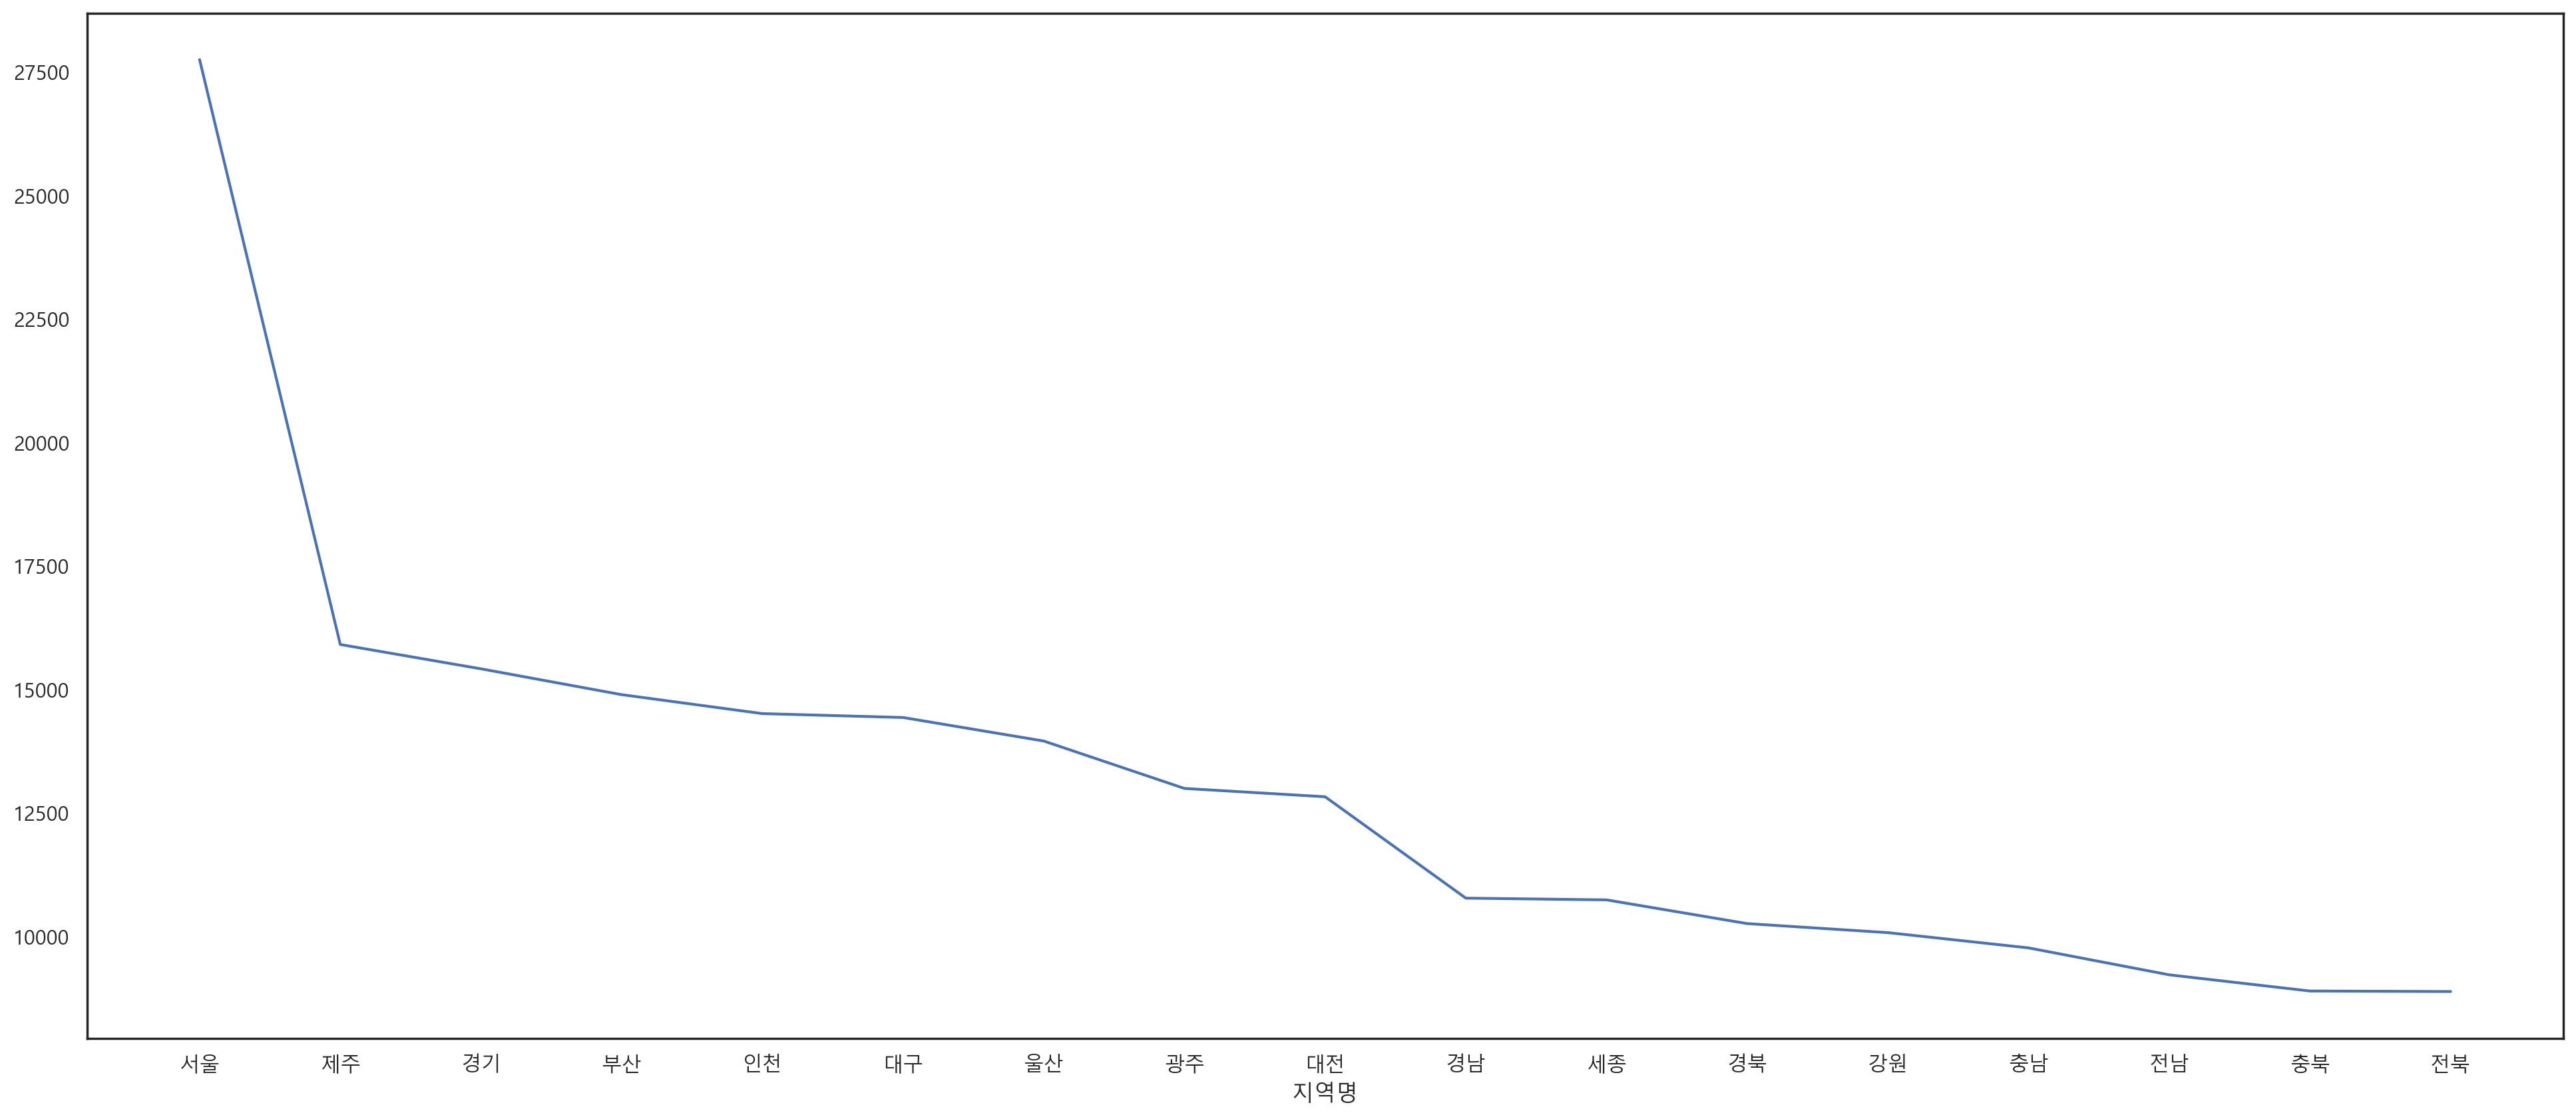

In [74]:
result = df_last.groupby('지역명')['평당분양가격'].mean().sort_values(
    ascending=False
)
ax = result.plot(kind='line')
ax.set_xticks(range(len(result)))
ax.set_xticklabels(result.index)
plt.show()

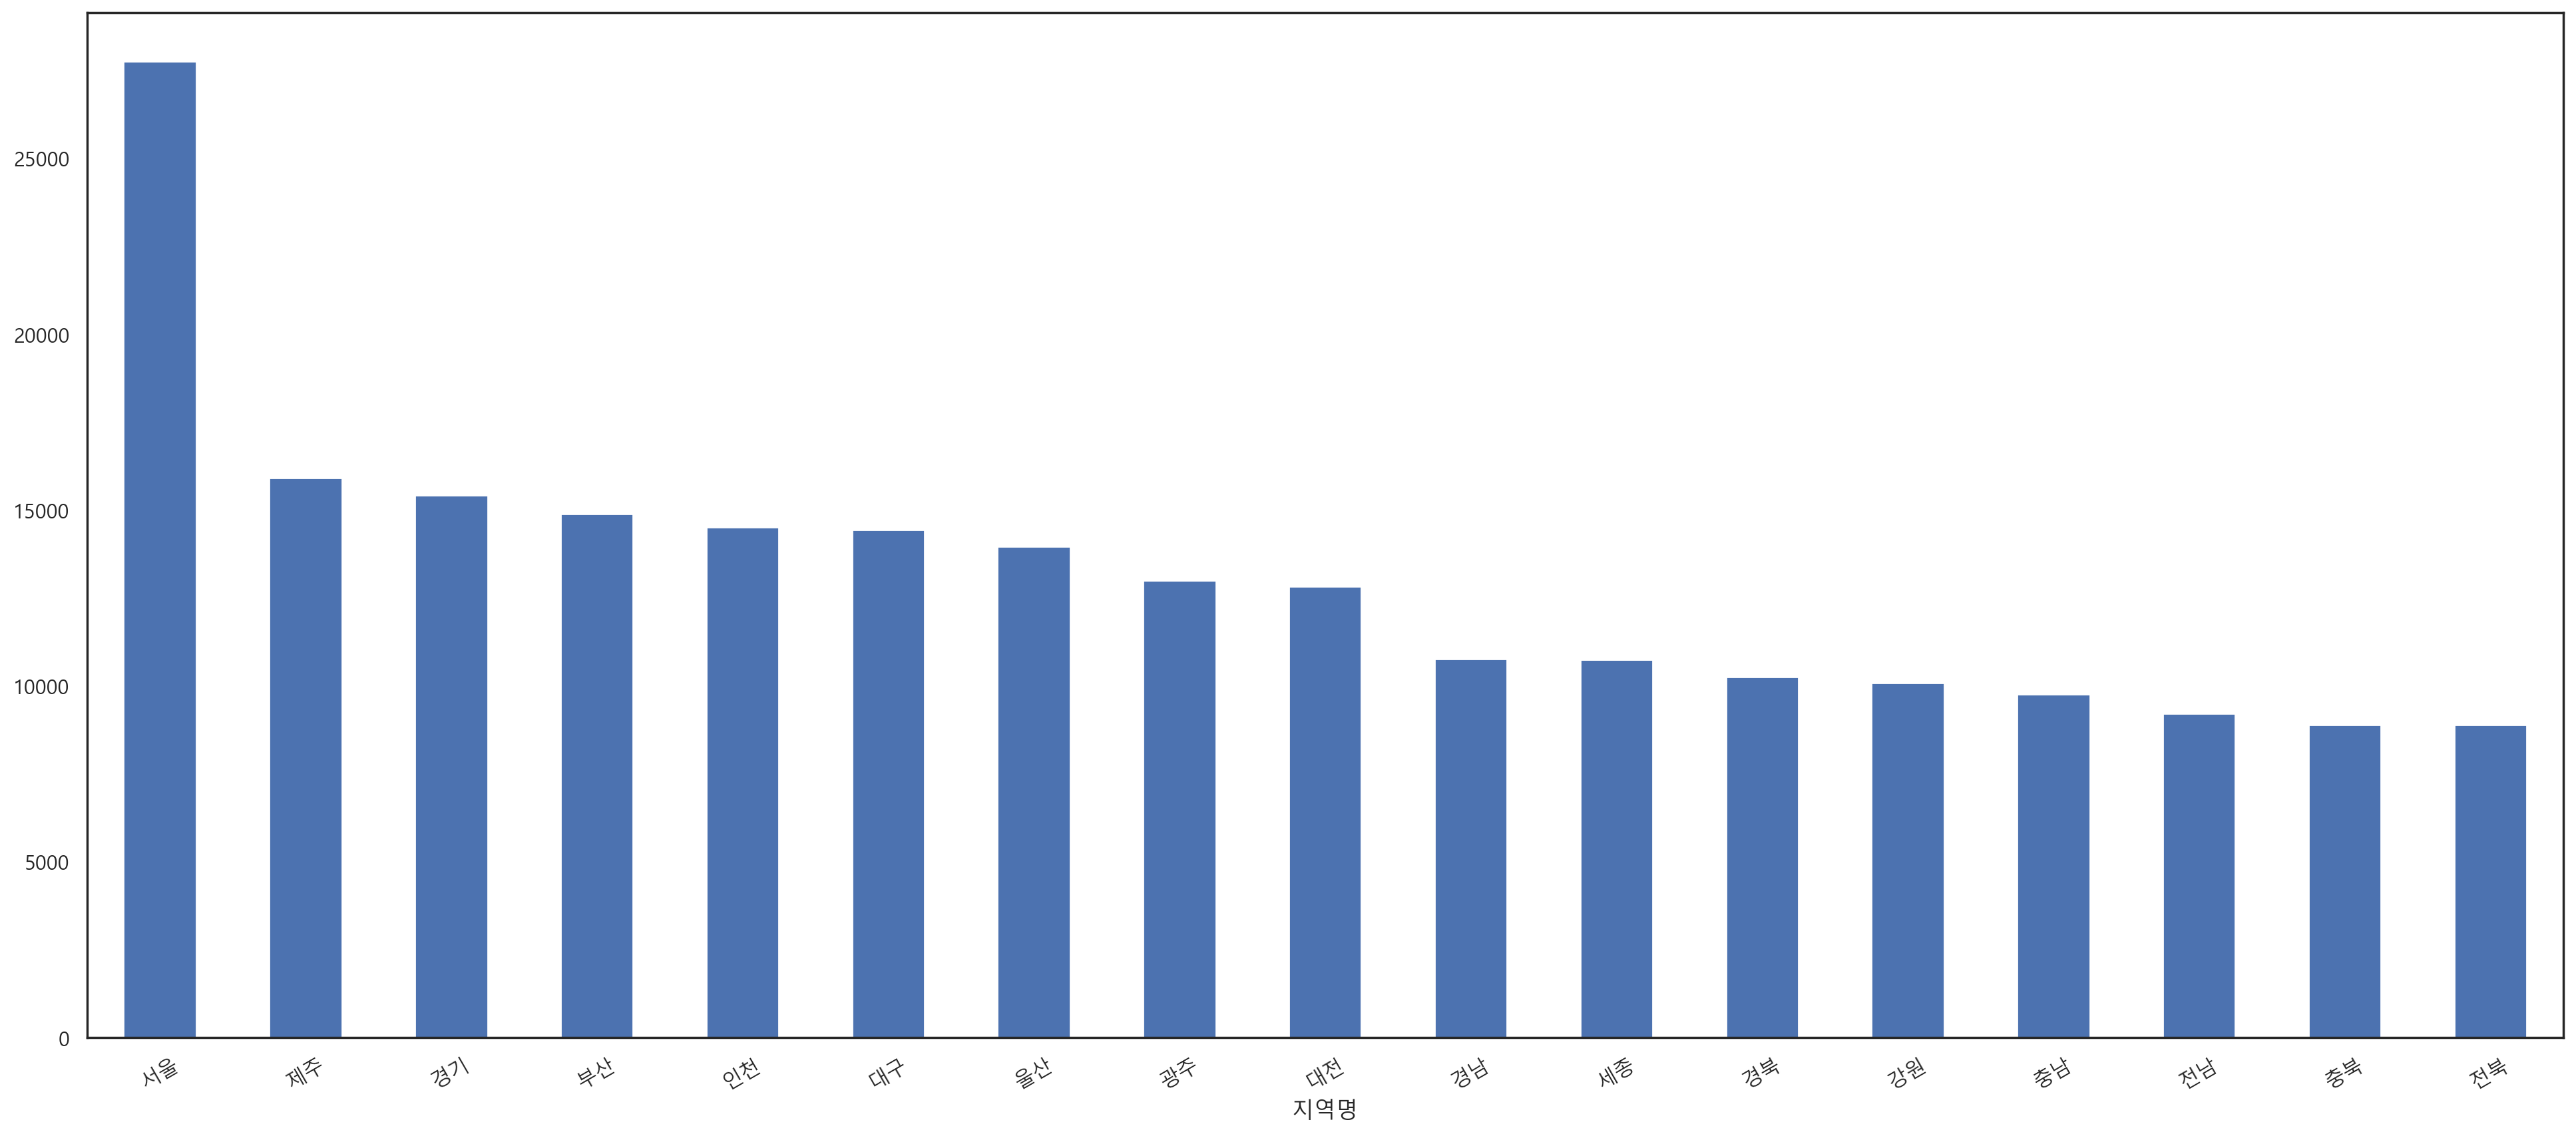

In [75]:
result.plot(kind='bar', rot=30)
plt.show()

## (3) 전용면적별 평당분양가격(barplot)

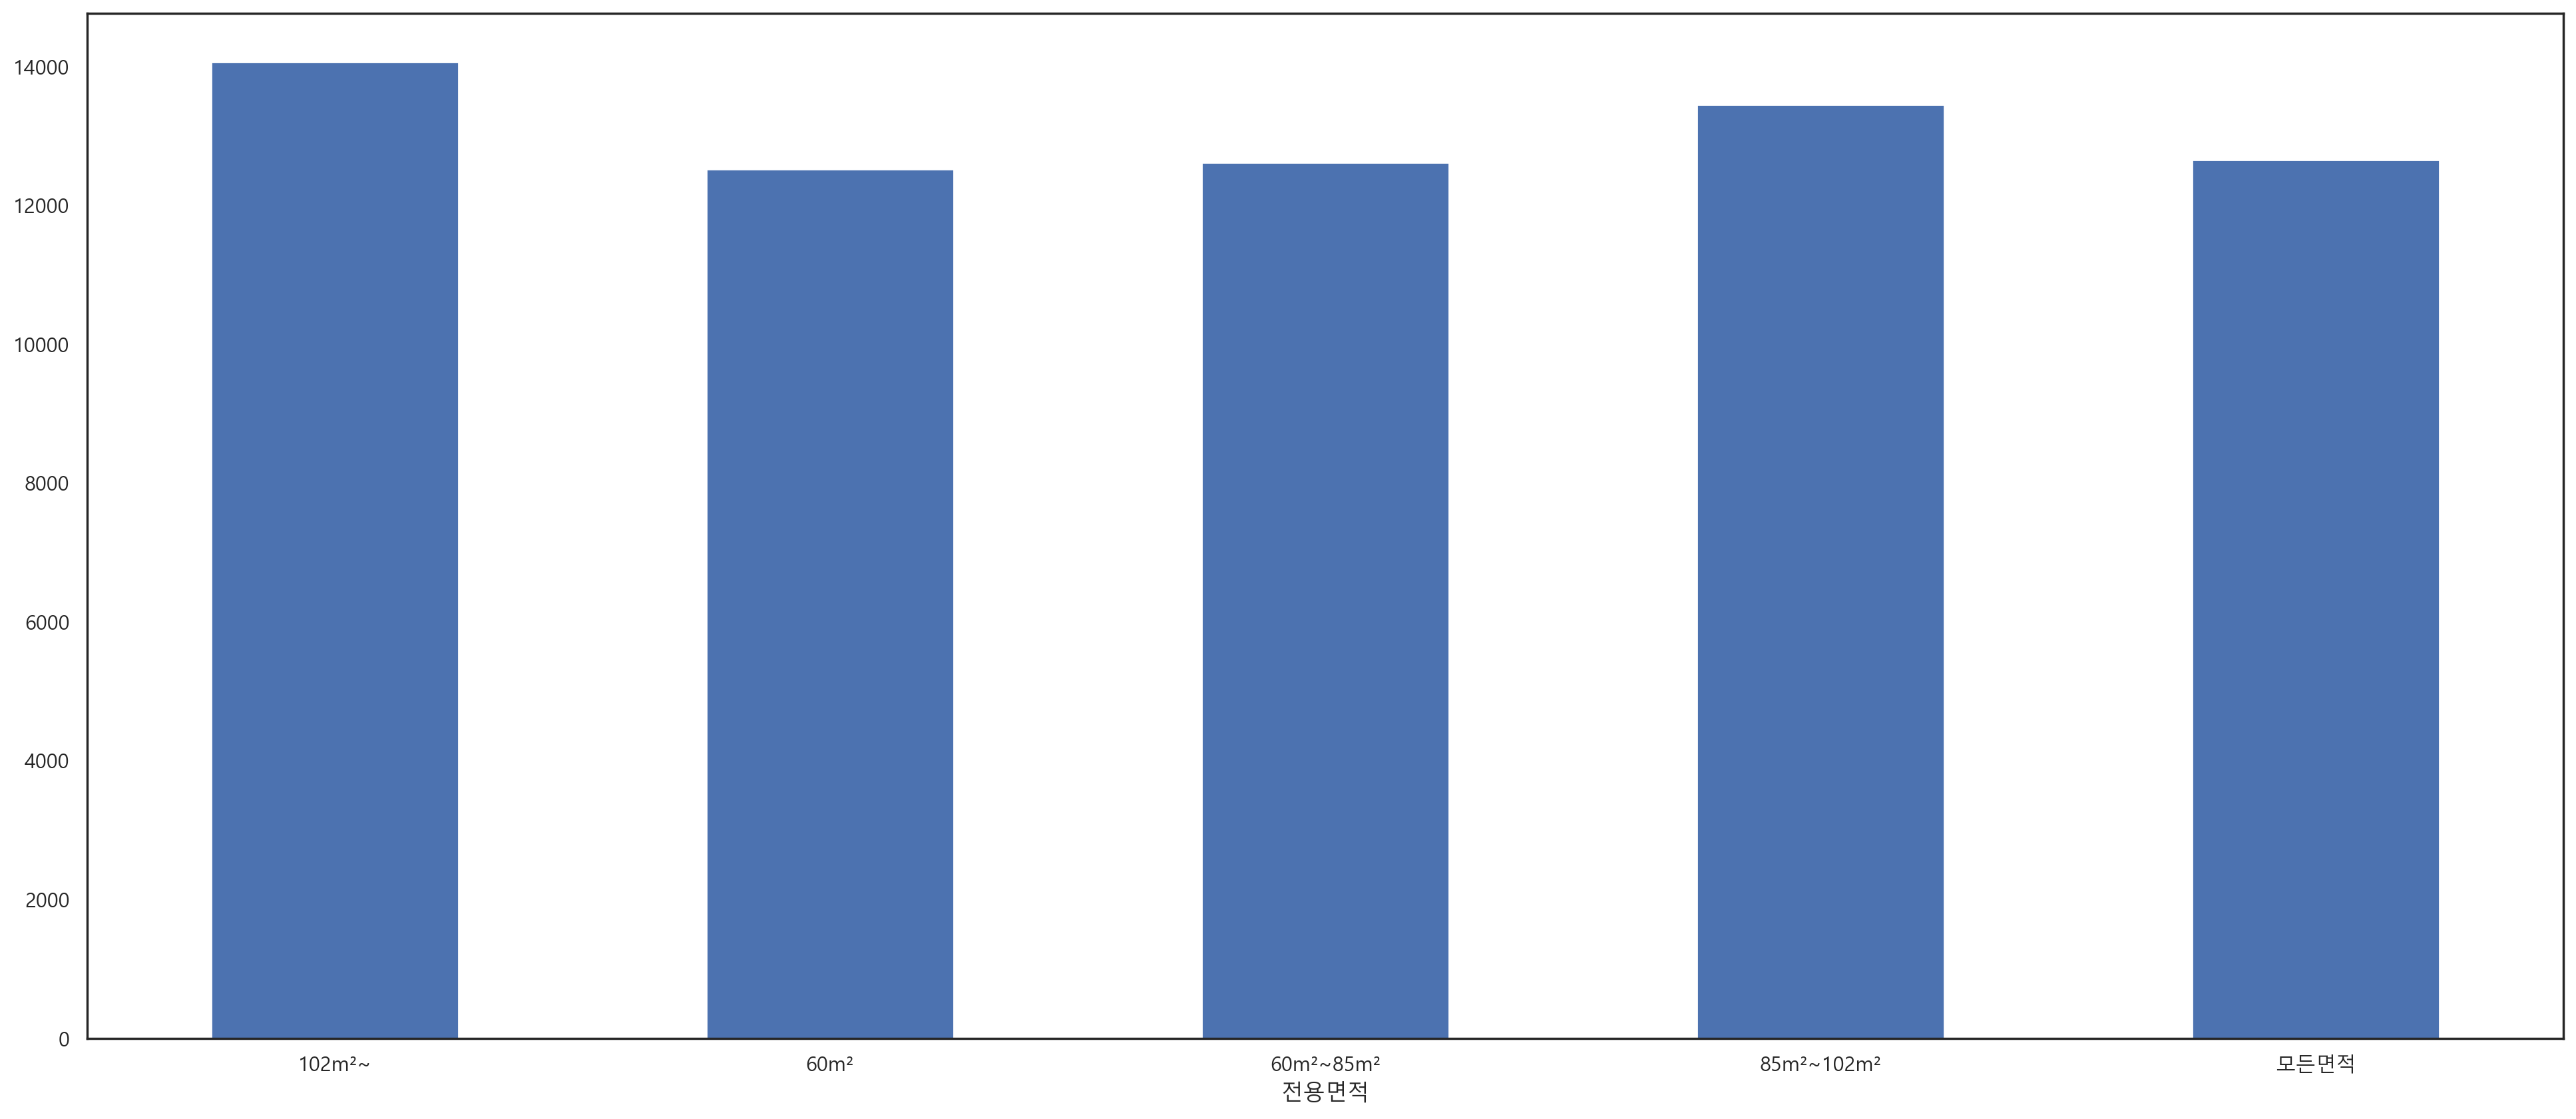

In [76]:
result = df_last.groupby('전용면적')['평당분양가격'].mean()
result.plot(kind='bar', rot=0)
plt.show()

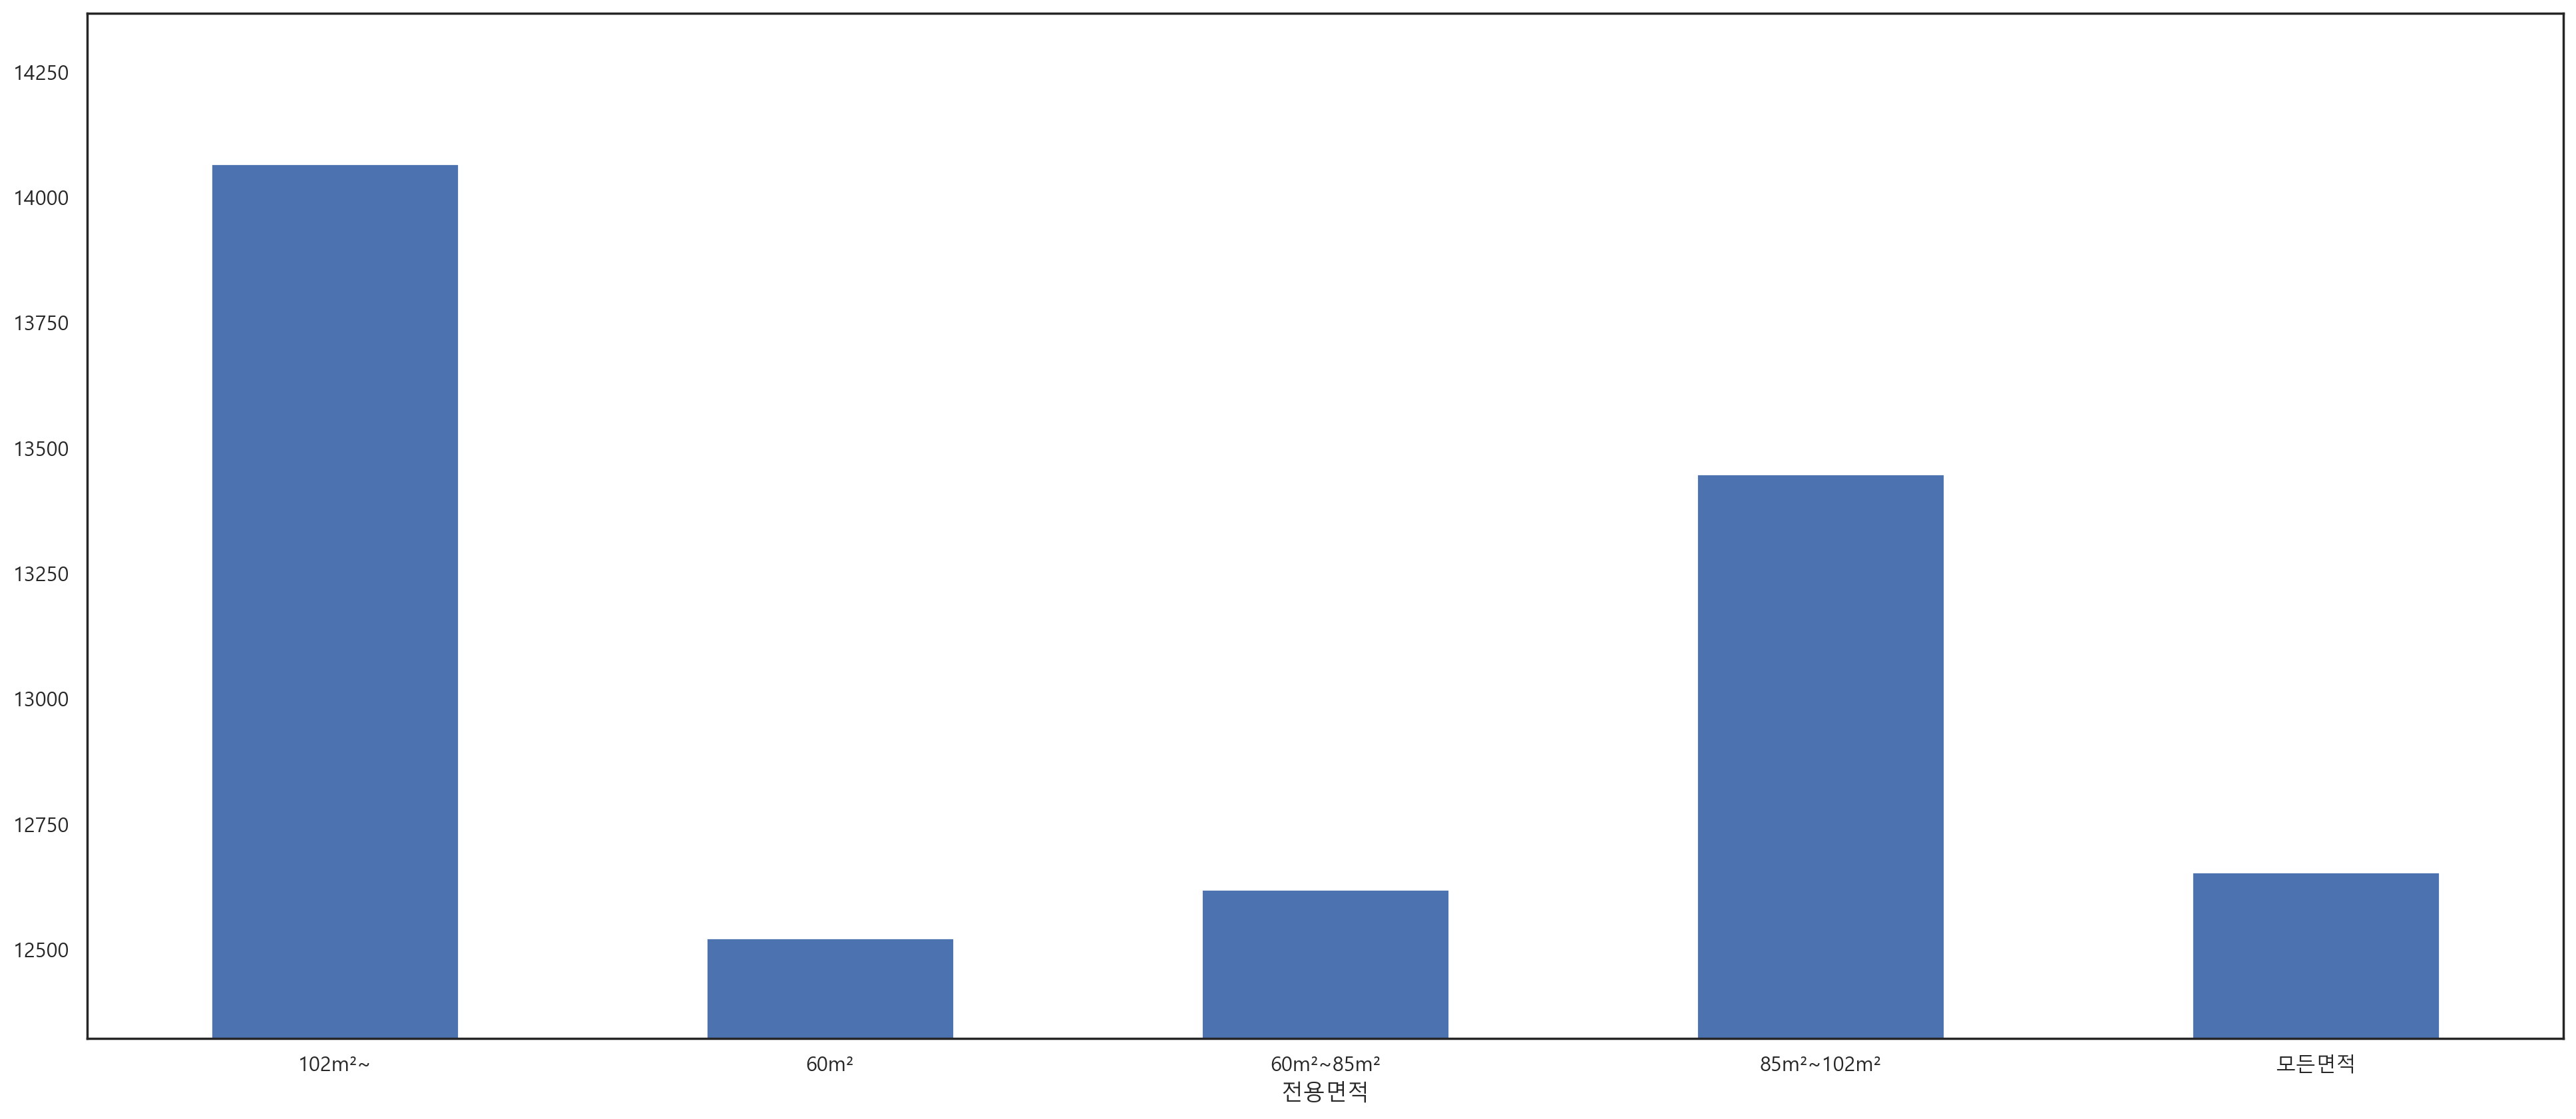

In [77]:
result.plot(kind='bar', rot=0,
           ylim = [result.min()-200, result.max()+300])
plt.show()

In [78]:
for val in result:
    print(val)

14066.826845637583
12522.77442680776
12619.048826815642
13447.67283519553
12654.068098159509


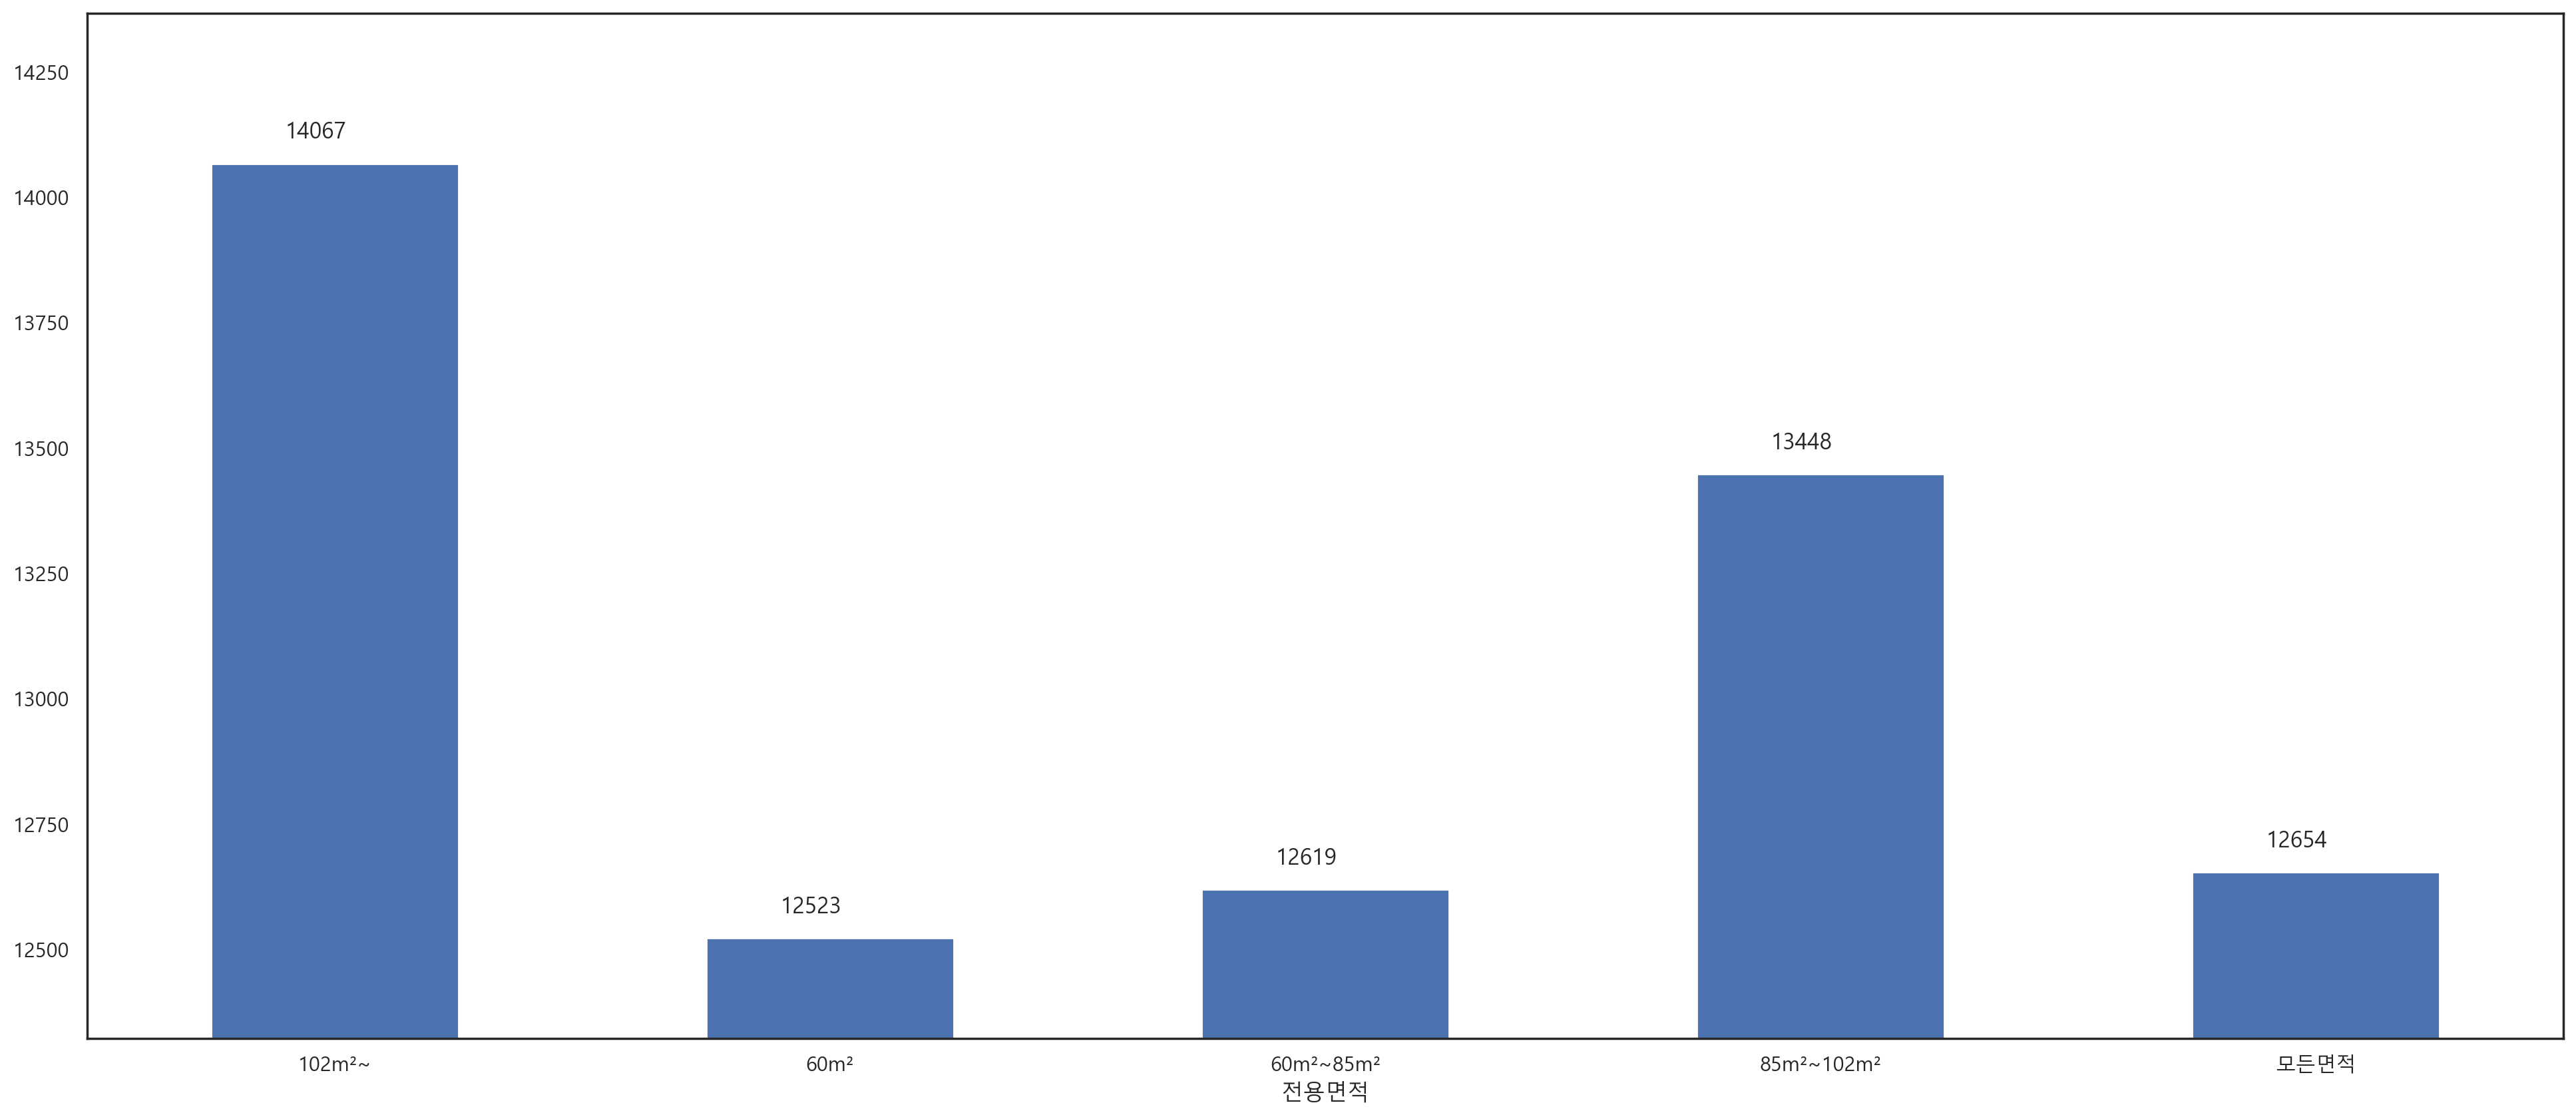

In [79]:
result.plot(kind='bar',
           rot=0,
           ylim=[result.min()-200, result.max()+300])
# plt.text(0-0.1, 14066+50, 14066)
# plt.text(1-0.1, 12522+50, 12522)
for i, val in enumerate(result):
    plt.text(i-0.1, val+50, round(val))
plt.show()

In [71]:
for key, val in result.items():
    print(key, val)

102m²~ 14066.826845637583
60m² 12522.77442680776
60m²~85m² 12619.048826815642
85m²~102m² 13447.67283519553
모든면적 12654.068098159509


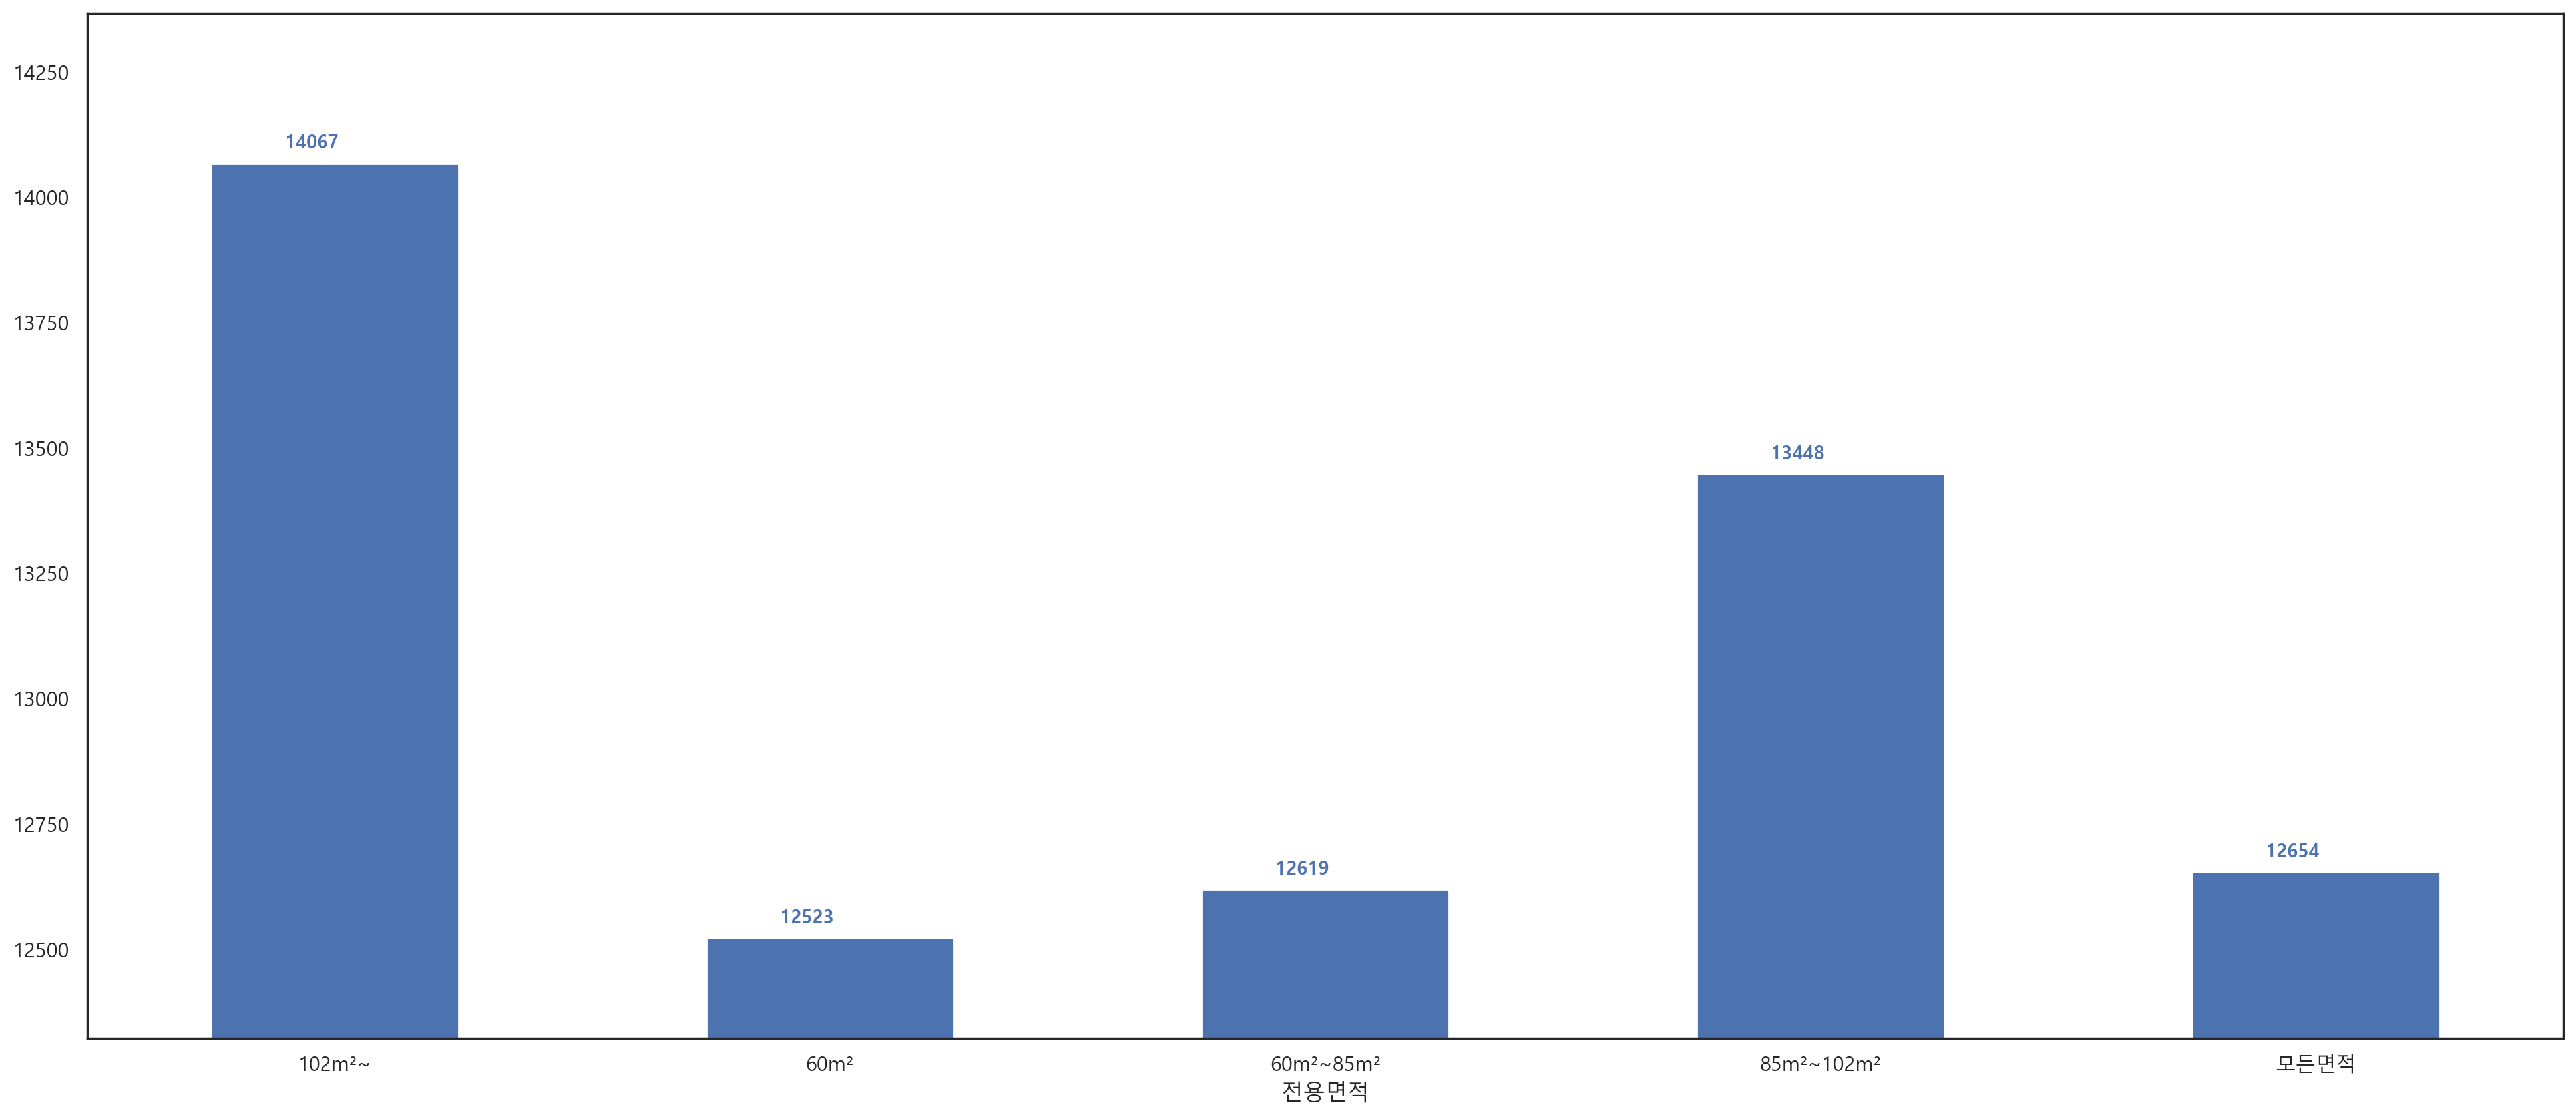

In [84]:
result.plot(kind='bar',
           rot=0,
           ylim = [result.min()-200, result.max()+300])
# plt.text(0-0.1, 14066+30, 14066)
# plt.text(1-0.1, 12522+30, 12522)
for i, val in enumerate(result):
    plt.text(i-0.1, val+30, round(val), color='b', fontsize=10, weight='bold')
plt.show()

## (4) 연도별 평균 평당분양가격(line, bar)

In [85]:
result = df_last.groupby('연도')['평당분양가격'].mean()
print('result :', result)
print('x축 :', result.index)
print('y축 :', [round(r,1) for r in result])

result : 연도
2015     9202.735802
2016     9683.025000
2017    10372.928923
2018    10978.938411
2019    12188.293092
2020    13039.422449
2021    13636.022540
2022    14942.504494
2023    16890.920657
2024    18962.919231
Name: 평당분양가격, dtype: float64
x축 : Int64Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype='int64', name='연도')
y축 : [9202.7, 9683.0, 10372.9, 10978.9, 12188.3, 13039.4, 13636.0, 14942.5, 16890.9, 18962.9]


In [86]:
for key, val in result.items():
    print(key, val)

2015 9202.735802469135
2016 9683.025
2017 10372.928923076923
2018 10978.938411316649
2019 12188.293092105261
2020 13039.42244897959
2021 13636.022539682539
2022 14942.504494382021
2023 16890.92065677966
2024 18962.91923076923


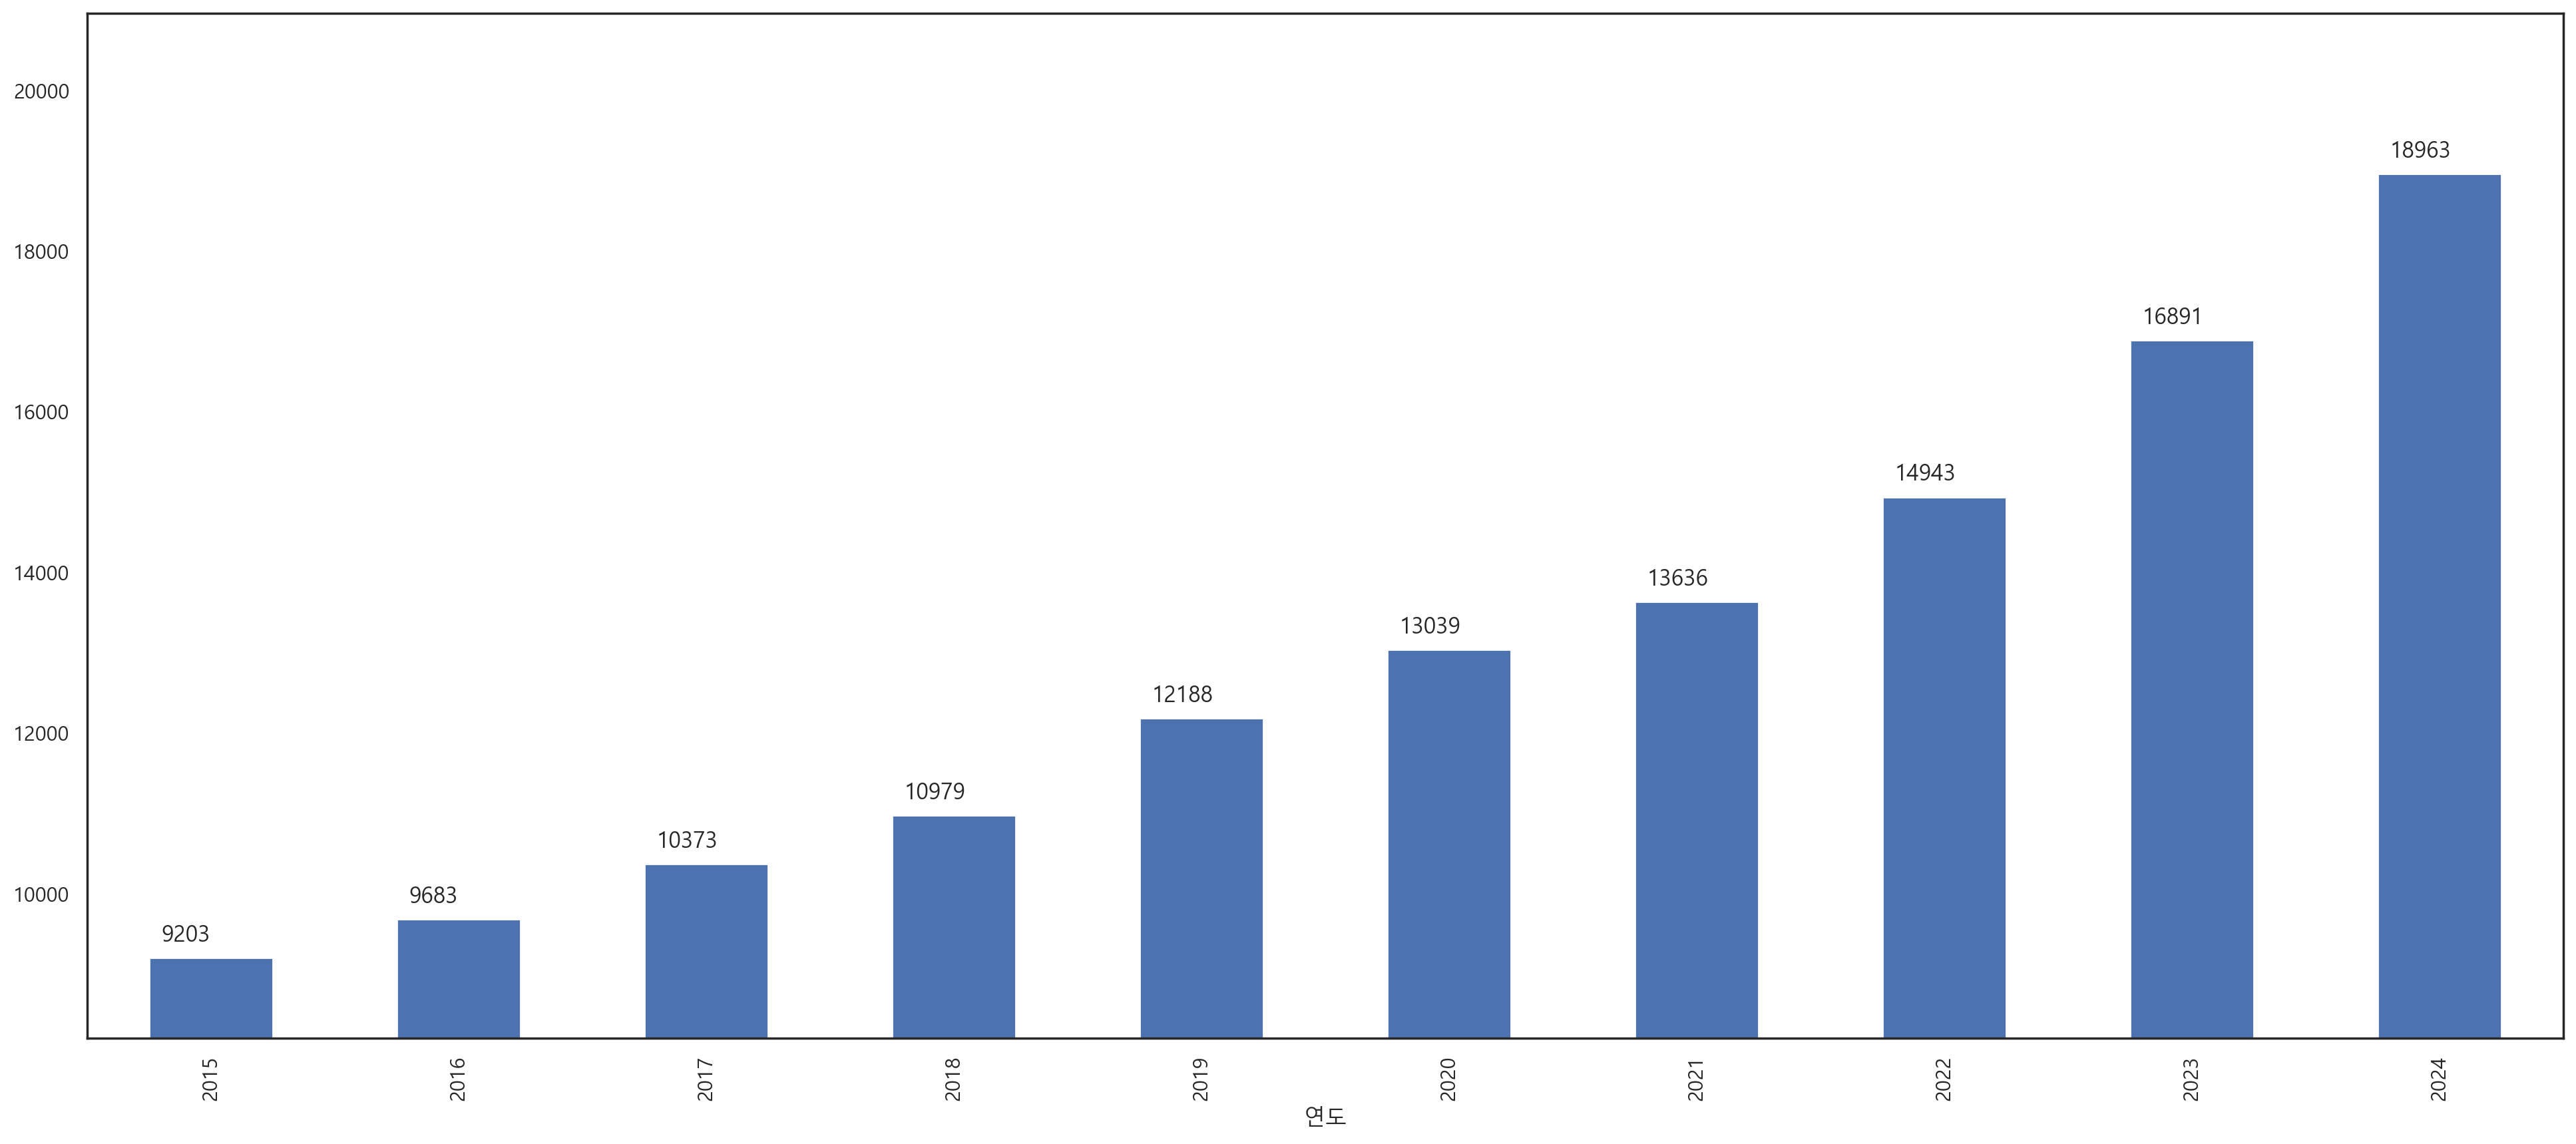

In [87]:
result.plot(kind='bar',
           ylim = [result.min()-1000, result.max()+2000])
# plt.text(2015, 15000, '샘플')
for i, val in enumerate(result):
    plt.text(i-0.2, val+200, round(val))

In [88]:
# 연도와 평당분양가격의 상관관계
df_last[['연도','평당분양가격']].corr()

,연도,평당분양가격
연도,1.000000,0.472675
평당분양가격,0.472675,1.000000


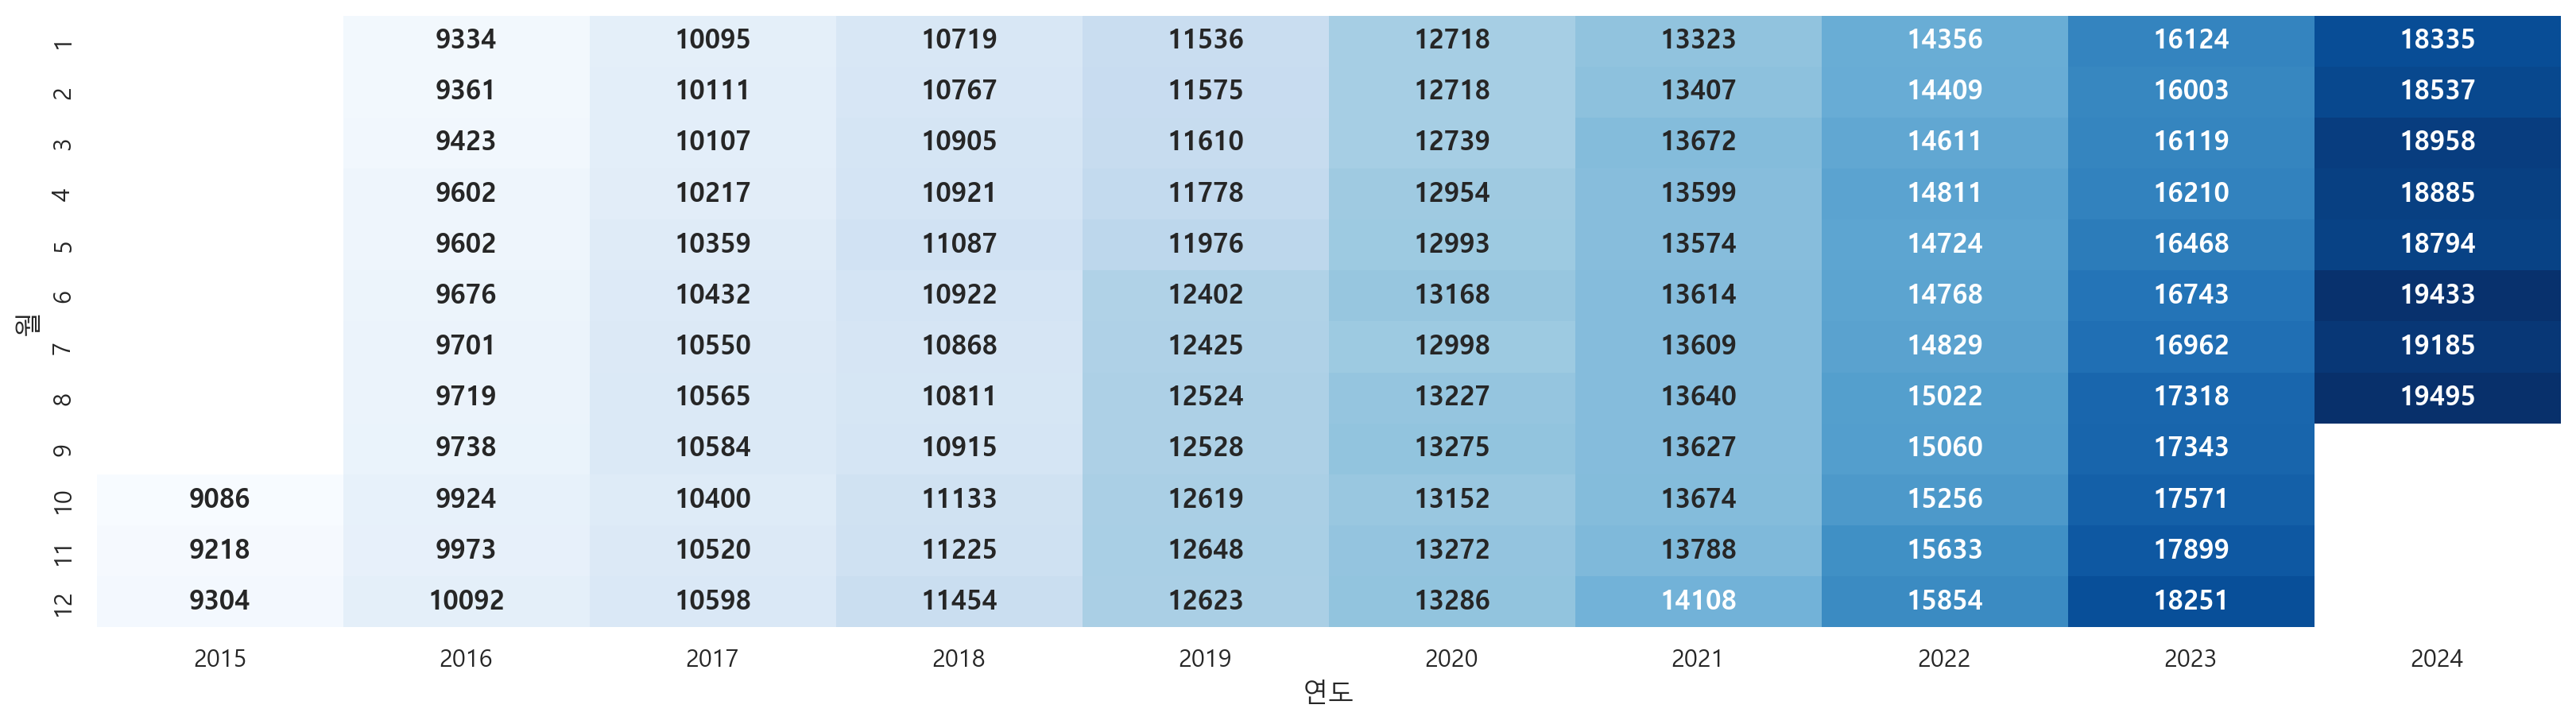

In [89]:
df_last.groupby(['월','연도'])['평당분양가격'].mean().unstack()
r = df_last.pivot_table(index='월',
                   columns='연도',
                   values='평당분양가격')
plt.figure(figsize=(20,5))
sns.heatmap(r, cmap='Blues', annot=True, fmt='.0f', cbar=False,
           annot_kws={'weight':'bold', 'size':12}
           )
plt.show()

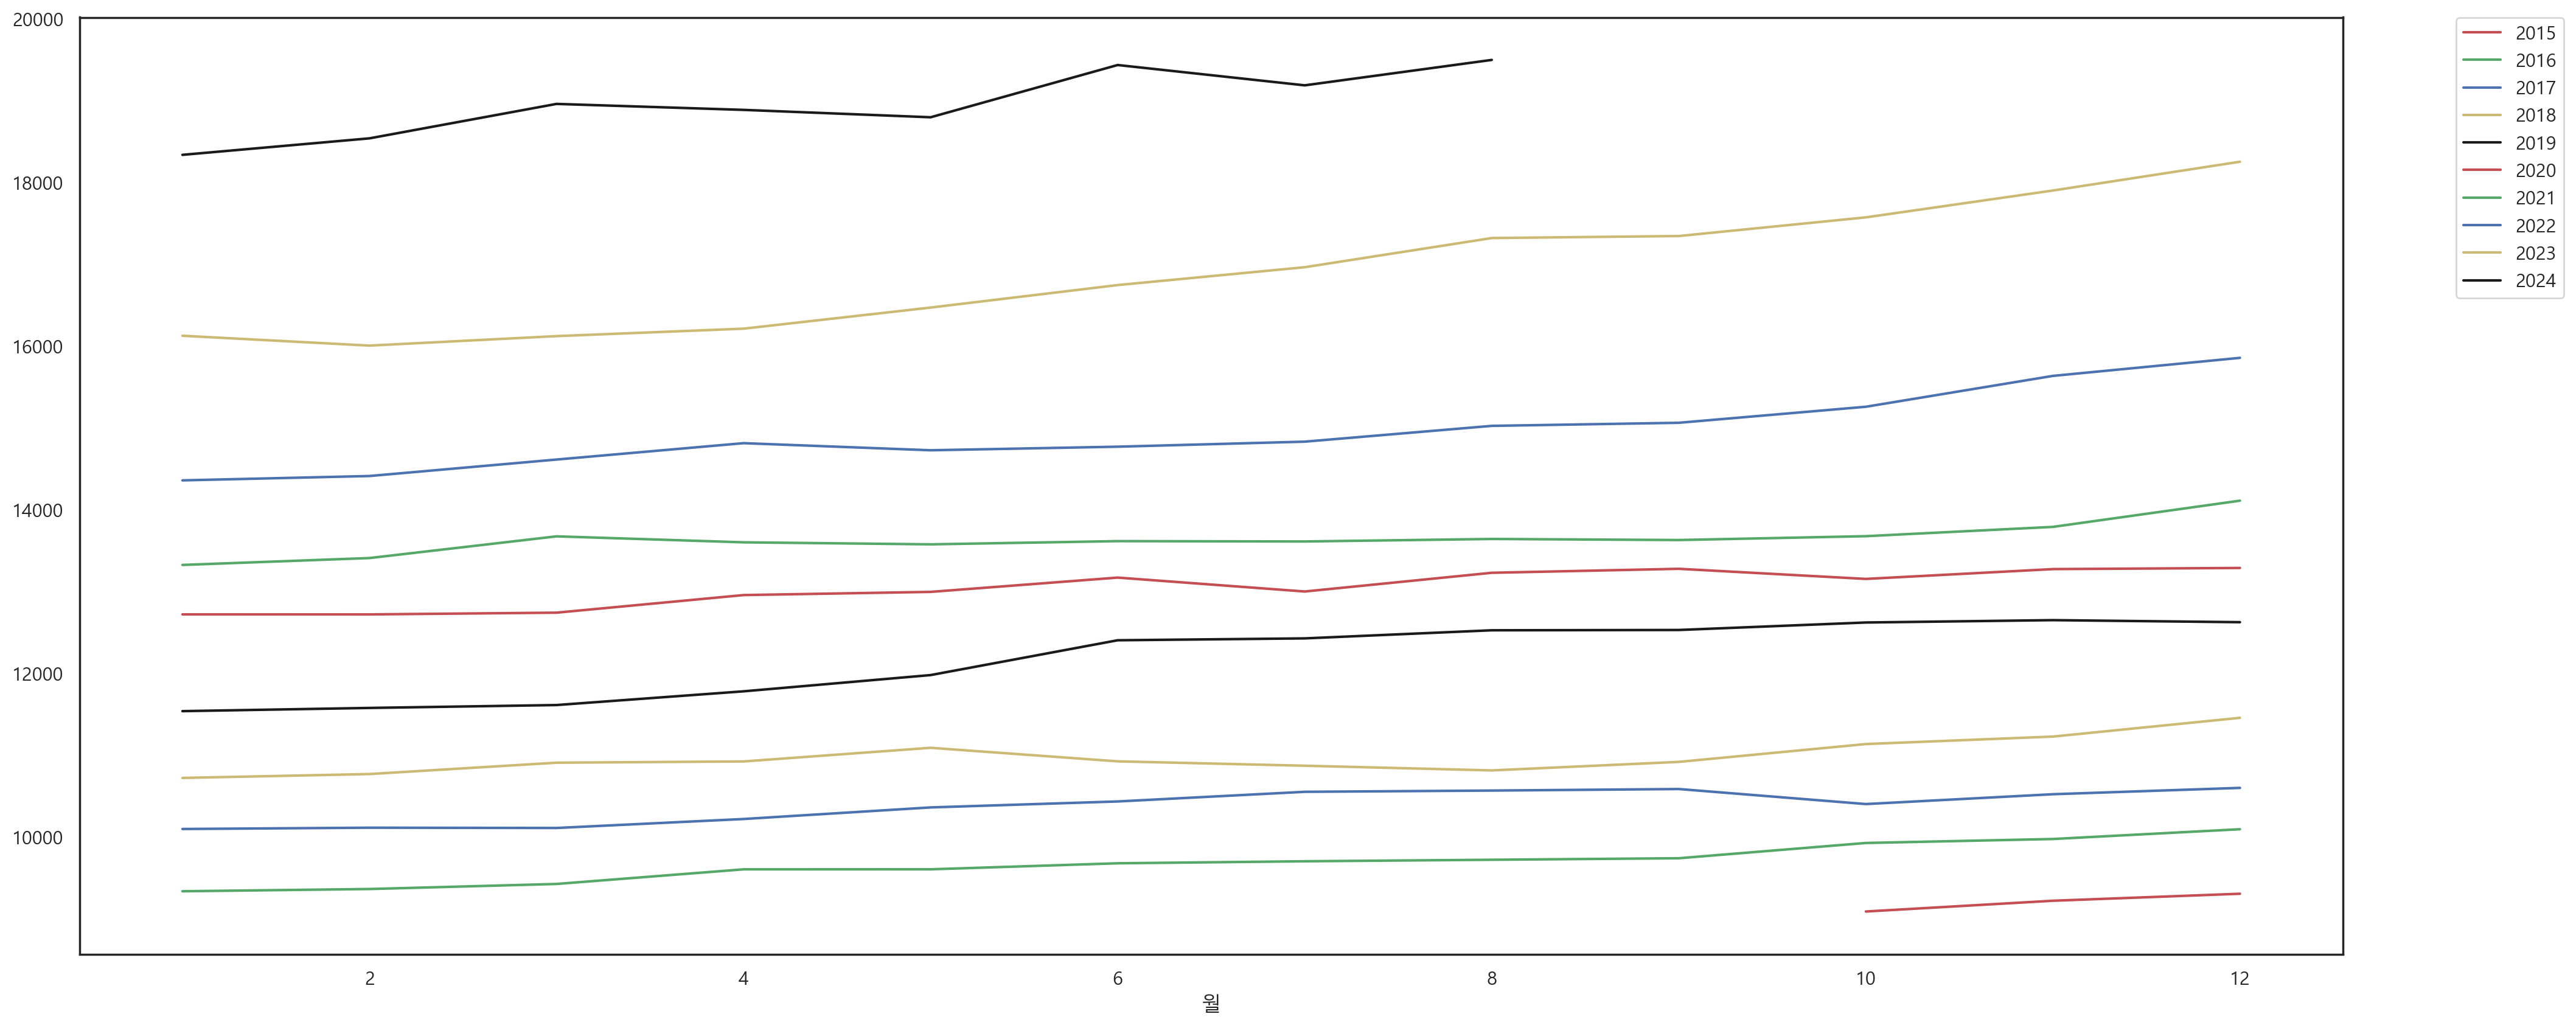

In [91]:
r.plot(color=['r','g','b','y','k'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

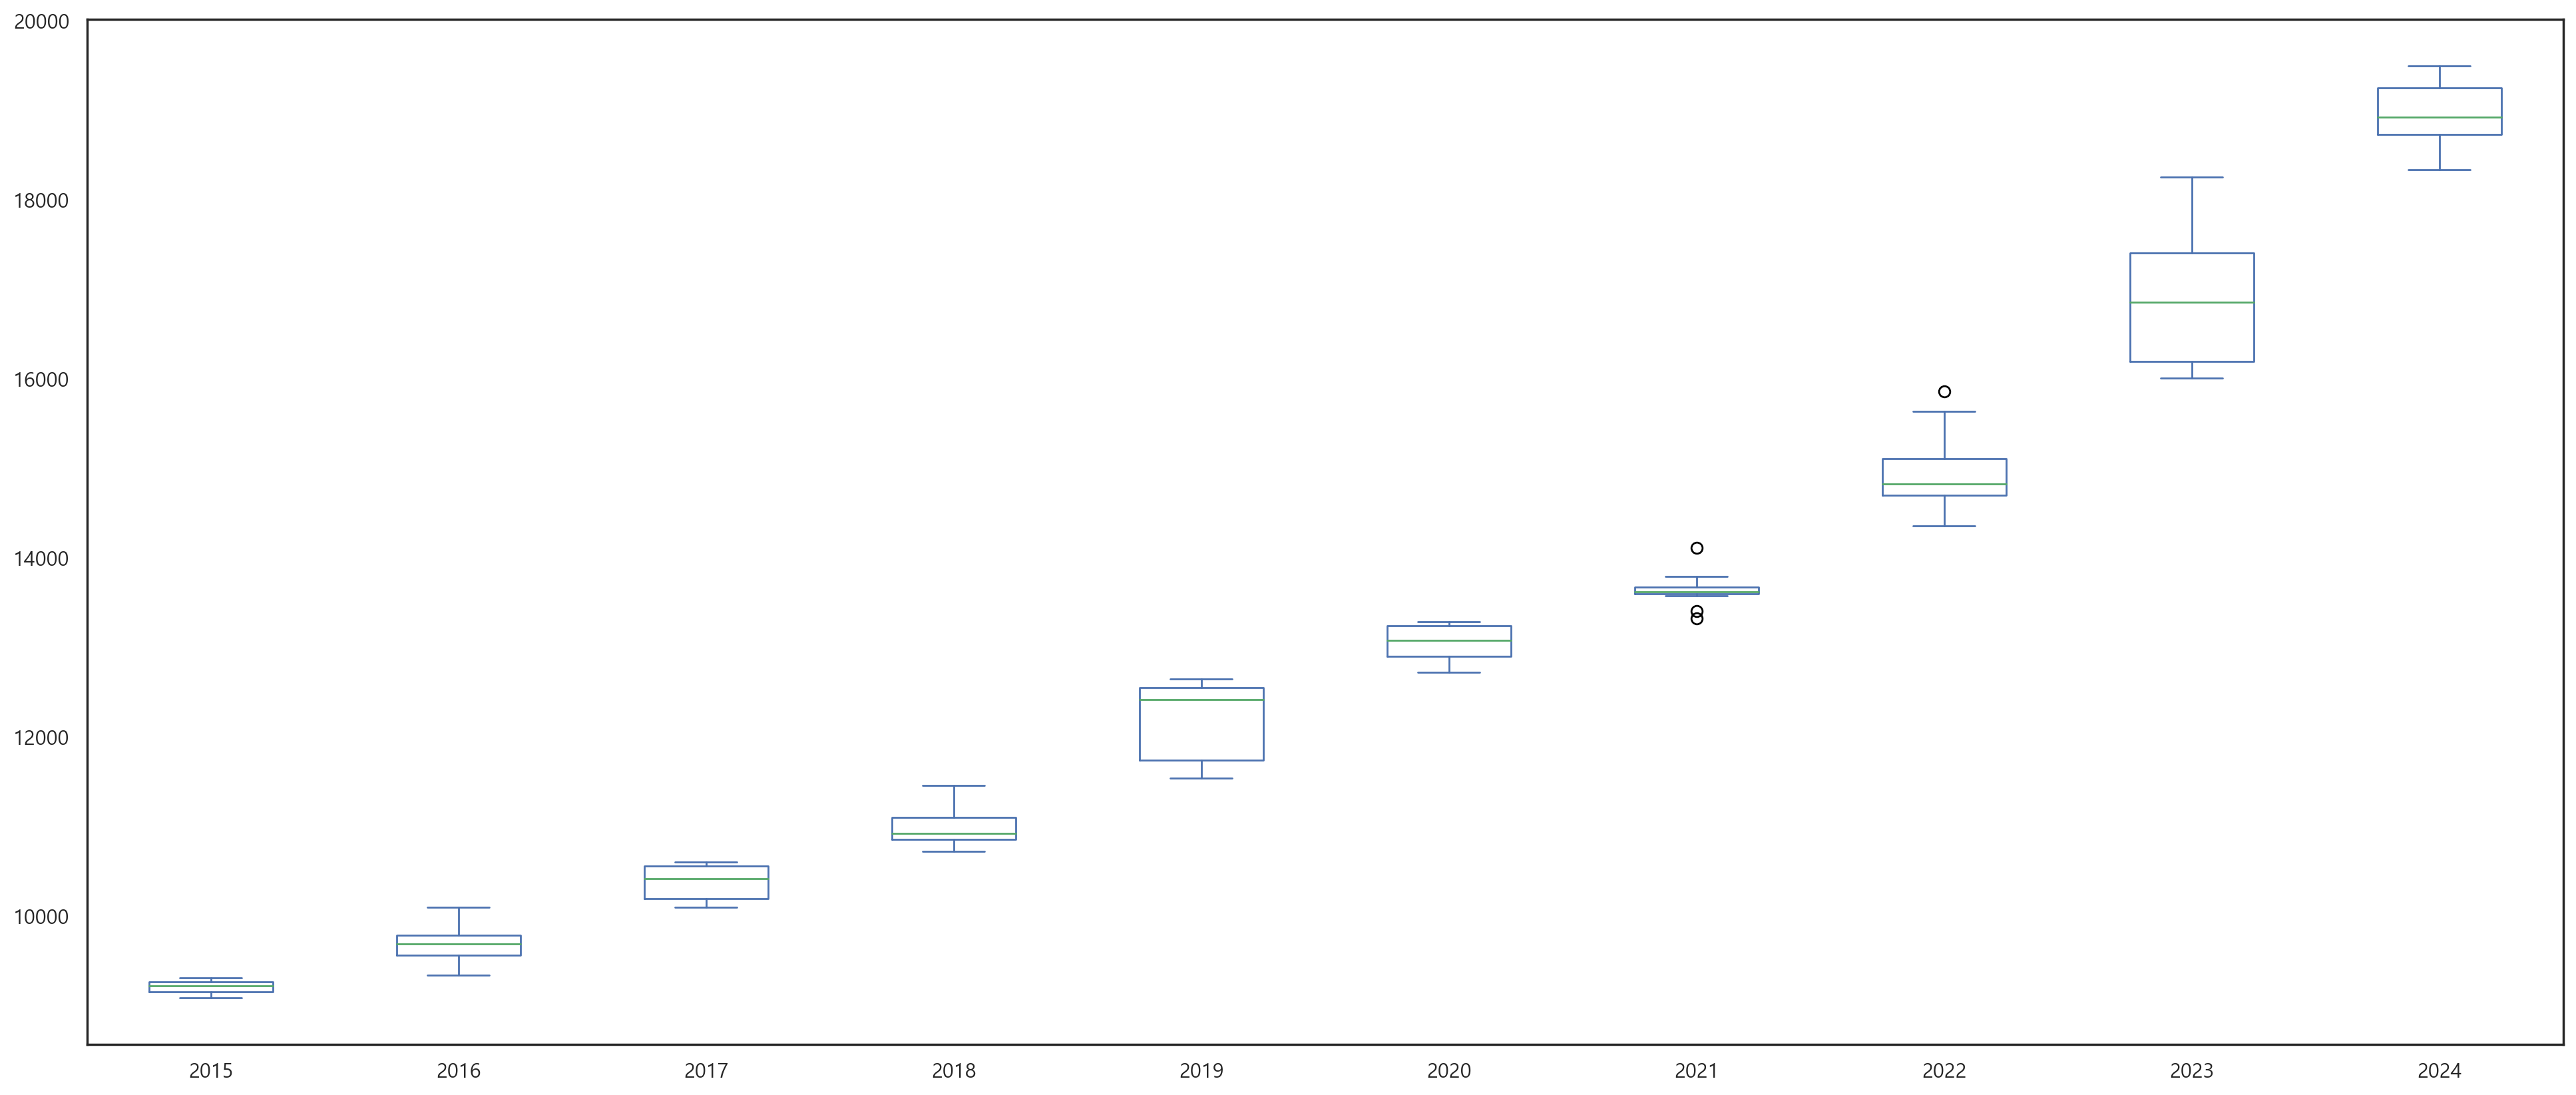

In [92]:
r.plot(kind='box')
plt.show()

범례:https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

# 9. seaborn으로 시각화
- 위에서 시각화한 내용을 seaborn으로 시각화

## (1) 지역별 평당분양가격

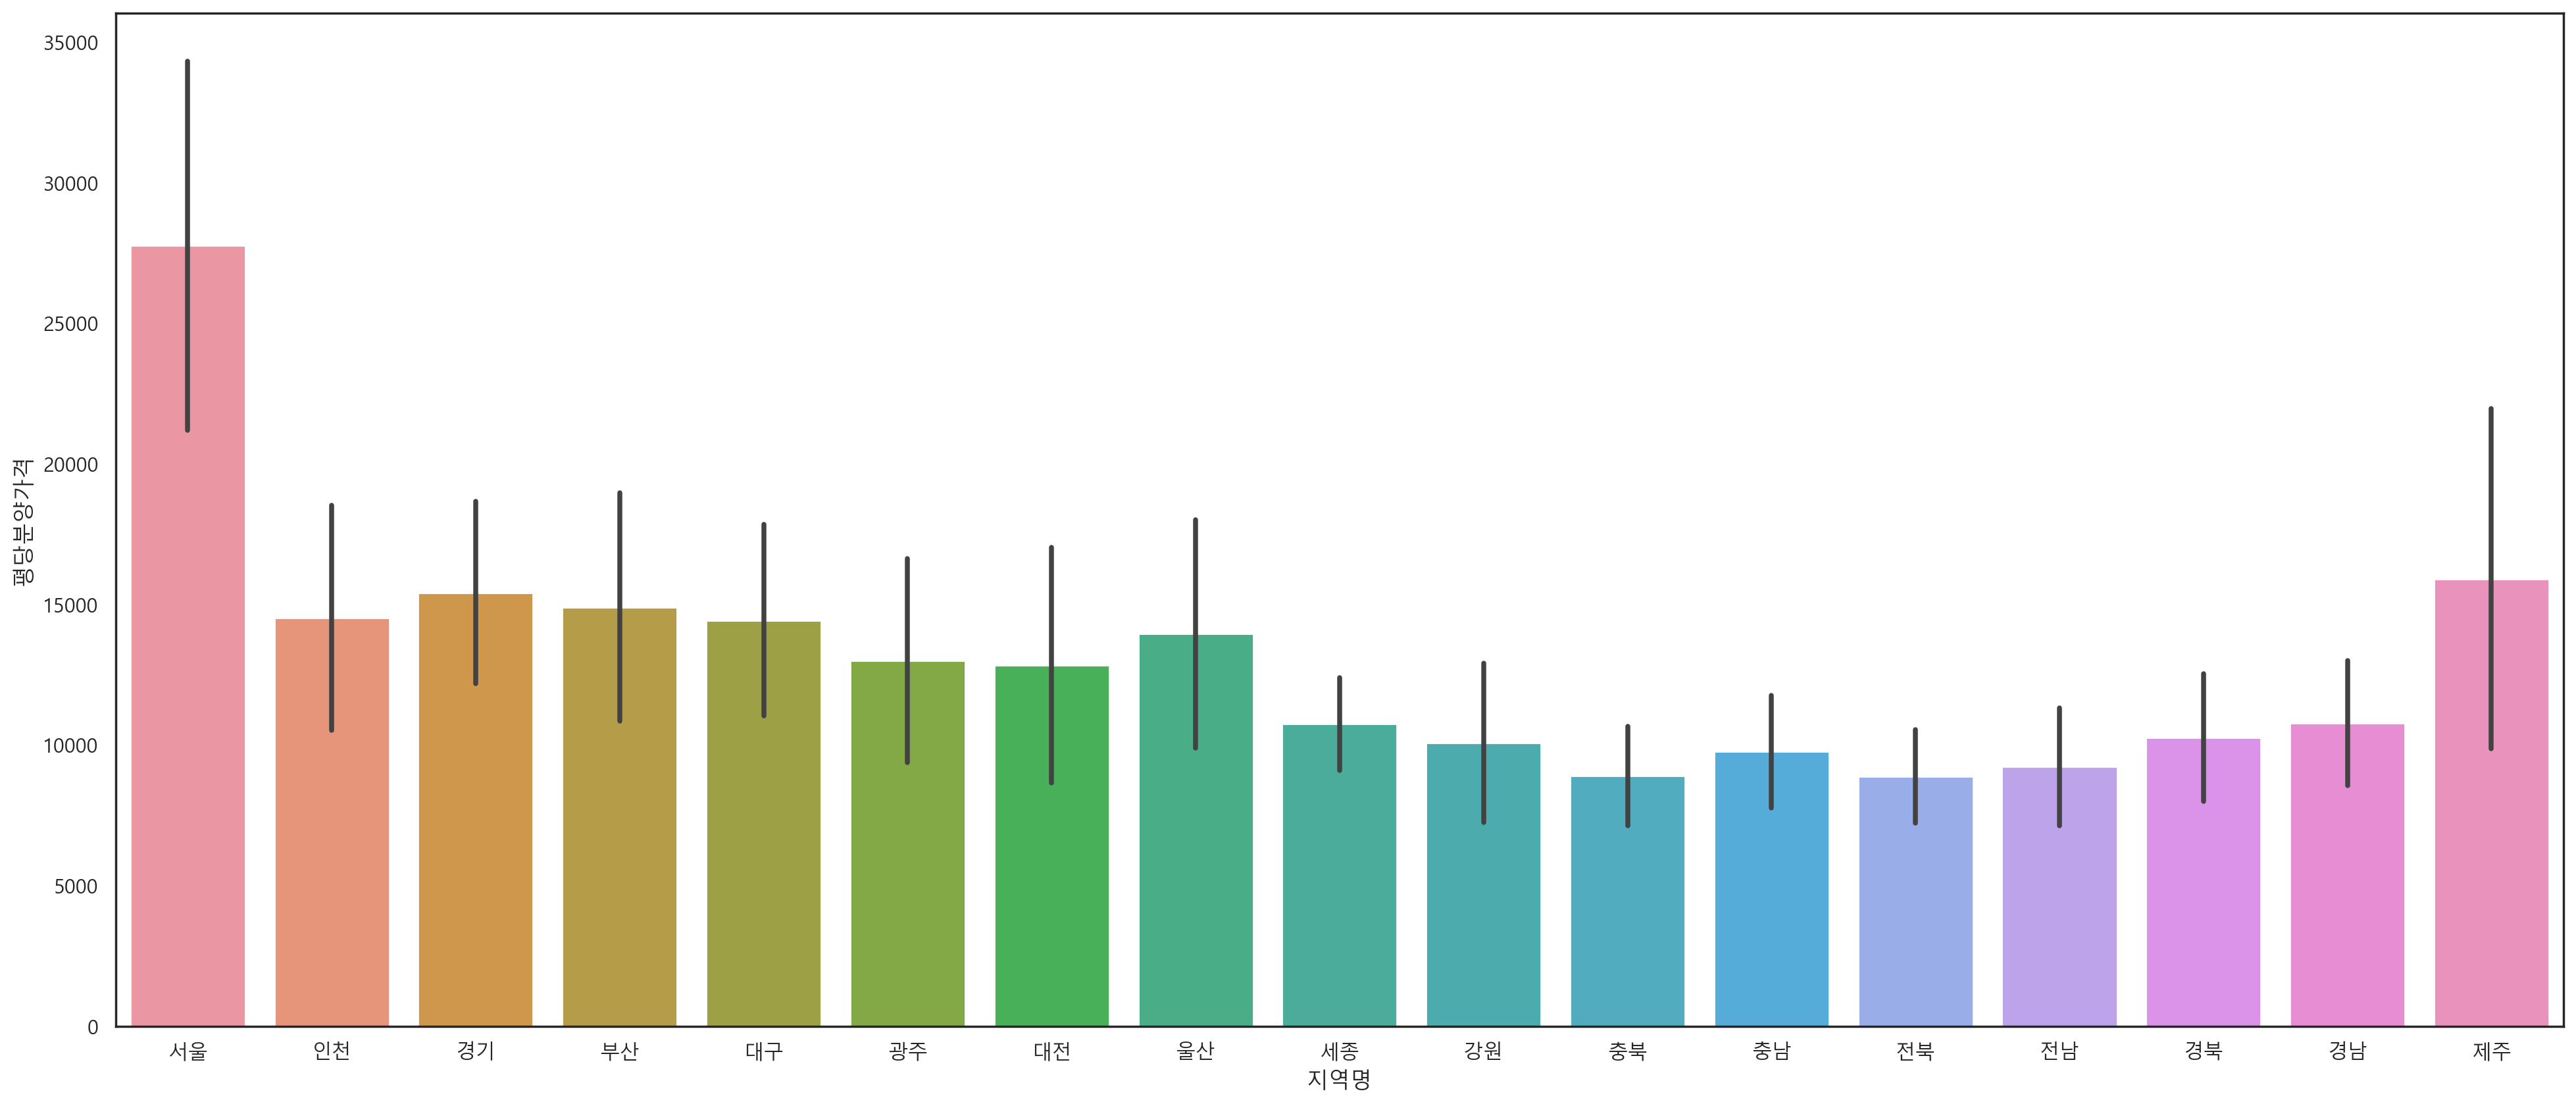

In [93]:
sns.barplot(data=df_last, x='지역명', y='평당분양가격',
#            errorbar=None,
#            errorbar=('ci',95),# 기본값(95% 신뢰구간)
           errorbar='sd'
           )
plt.show()

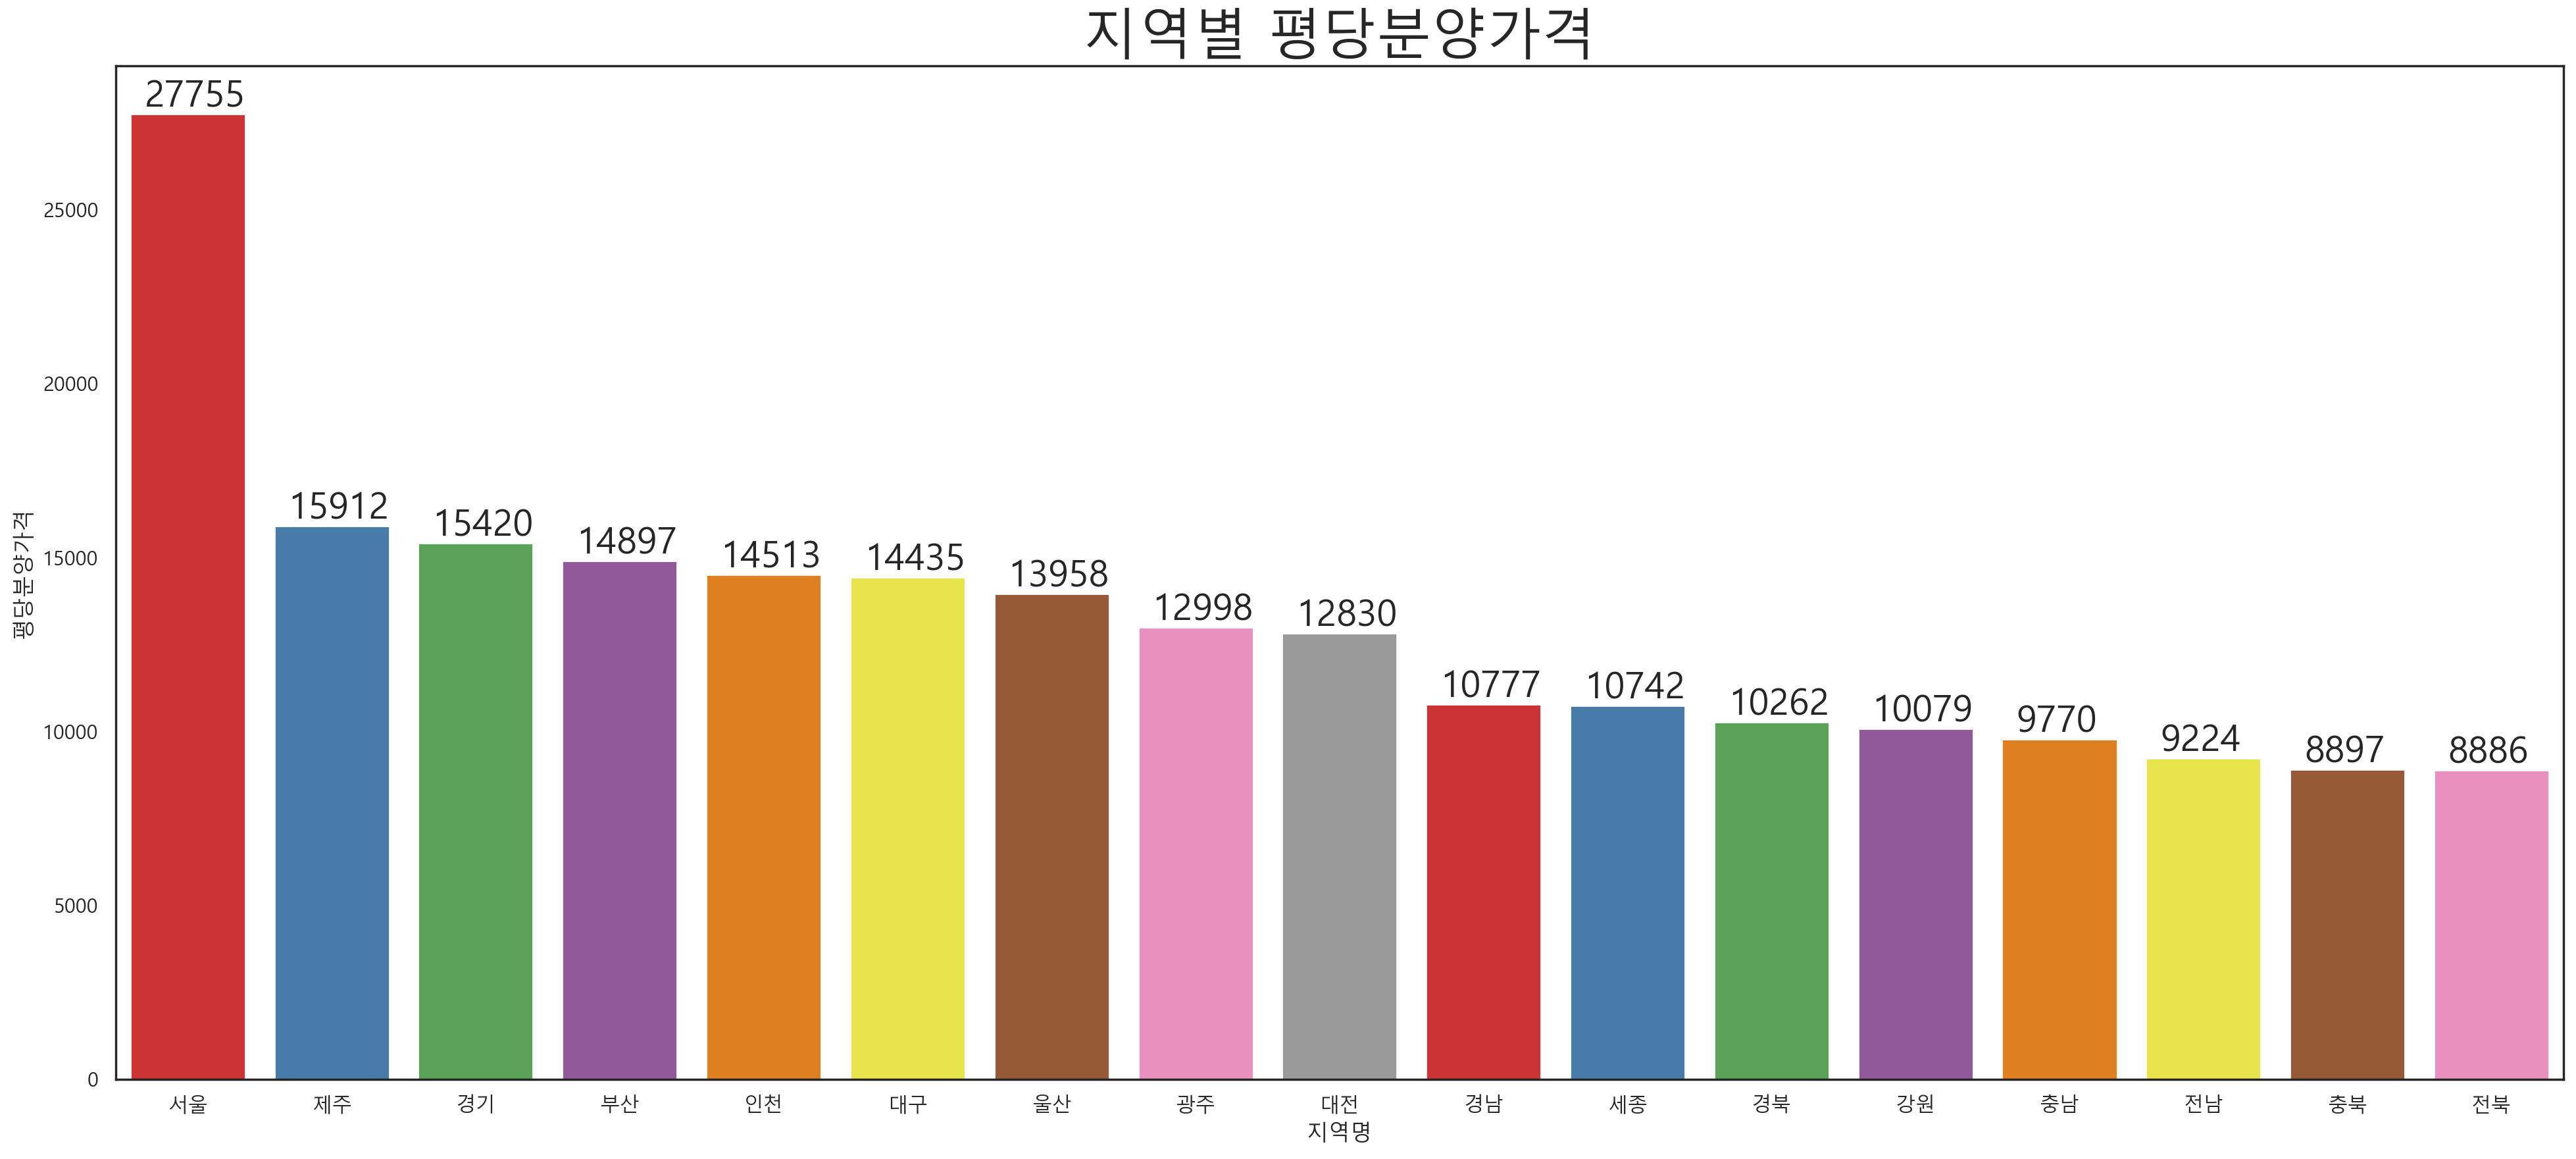

In [110]:
# 정렬된 순서로 시각화
result = df_last.groupby('지역명')['평당분양가격'].mean().sort_values(
                                                    ascending=False)
sns.barplot(data=df_last, x='지역명', y='평당분양가격',
            errorbar=None, order = result.index, palette='Set1')
plt.title('지역별 평당분양가격', size=30)
for i, val in enumerate(result):
    plt.text(i-0.3, val+200, round(val), fontsize=20)
plt.show()

## (2) 연도별 평당분양가격

## (3) 그 외 lineplot, relplot, boxplot, violinplot, boxexplot, regplot, swarmplot

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용(교안 20page)

# 10. 구조가 다른 df_first와 df_last를 연결 후 분석
## (1) concat
- new_first :df_first를 [지역명, 연도, 월, 평당분양가격]으로 변환
- new_last : df_last를 [지역명, 연도, 월, 평당분양가격]으로 변환
                (전용면적이 모든면적인 행만 추출후, 전용면적 열을 삭제)

## (2) 결측치 대체(연도별, 지역별 중위값)

## (3) df.csv파일로 출력

## (4) 7절부터 9절까지 분석을 한다(전용면적별 분석은 불가)

- 지역명별 데이터 갯수는 결측치가 없어서 동일(groupby나 pivot_table등으로 확인)
- 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)
- 연도별 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)

### ① 지역명별 데이터 행 갯수 : 결과가 1차원 시리즈

### ② 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

In [ ]:
# 지역명당 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)

### ③ 연도별 평당분양가격(평균)

In [ ]:
# 연도별 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)

### ④ 연도, 지역별 평당분양가격(평균)

In [ ]:
# 연도별, 지역별 평당분양가격 시각화(heatmap)

In [ ]:
# 년도별 평균 평당분양가격의 추이

In [ ]:
# 위의 그래프가 겹쳐서 작 보이지 않아 분리

In [ ]:
# 관계형 그래프의 서브플롯을 그리는 함수는 relplot
# 범주형 그래프의 서브플롯을 그리는 함수는 catplot

In [ ]:
# 연도별 평당분양가격의 사분위수


In [ ]:
# 연도별 평당분양가격의 사분위수(분포포함 boxenplot)


In [ ]:
# 연도별 평당분양가격의 사분위수(분포포함 violinplot)


In [ ]:
# 연도에 따른 평당분양가격을 회귀식으로 시각화


In [ ]:
# swarmplot은 많은 데이터를 그리기에는 시간이 많이 걸려 5%만 sampling후 그릴 것을 추천
# 연도별 평당분양가격 산점도
 

In [ ]:
# 분양가격을 hist
